# Estudo do COVID-19 no Ceará
*Luís Eduardo Pompeu de Sousa Brasil Háteras*

* API Dataset: https://brasil.io/api/dataset/covid19/caso/data


* Planilha com Dados Oficiais do Ministério da Saúde: https://docs.google.com/spreadsheets/d/1vSxIPmqUbYTyLLM4eNddfU6CT2loAcWVQ0NX-gItceU/edit#gid=0


* Código Estados IBGE: https://atendimento.tecnospeed.com.br/hc/pt-br/articles/360021494734-Tabela-de-C%C3%B3digo-de-UF-do-IBGE

## Extração dos dados dos estados:

In [1]:
import json
import requests
from operator import itemgetter
import csv

# Saber a última página a ser filtrada
global pagina_final
pagina_final = 1
check = 1
for i in range(1, 100):
    response = requests.get(
        'https://brasil.io/api/dataset/covid19/caso/data?format=json&json=%22results%22&page=' + str(i))
    if response.status_code != 200:
        pagina_final = check
        break
    else:
        check = check+1

# Converter lista para CSV
def convert_csv(lista):
    with open('export.csv', 'w') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerows(lista)

# Função para extrair dados da API por estado.
def extrair(city_ibge_code):
    dados = []
    for i in range(1, pagina_final):
        response = requests.get(
            'https://brasil.io/api/dataset/covid19/caso/data?format=json&json=%22results%22&page=' + str(i))
        content = json.loads(response.text)
        for element in content['results']:
            if element['city_ibge_code'] == city_ibge_code:
                dados.append(element)
    return(dados)

# Função para extrair último dado de todos estados
def last_data():
    nome_estado = []
    casos_estado = []
    casos_estado_100k = []
    mortes_estado = []
    rate_morte = []
    combinacao = []
    data_estado = []
    for i in range(1, pagina_final):
        response = requests.get(
            'https://brasil.io/api/dataset/covid19/caso/data?format=json&page=' + str(i))
        content = json.loads(response.text)
        for element in content['results']:
            if element['place_type'] == 'state' and element['is_last'] == True:
                data_estado.append(element['date'])
                nome_estado.append(element['state'])
                casos_estado.append(element['confirmed'])
                casos_estado_100k.append(
                    element['confirmed_per_100k_inhabitants'])
                mortes_estado.append(element['deaths'])
                if element['death_rate'] == None:
                    rate_morte.append('0')
                if element['death_rate'] != None:
                    rate_morte.append("{:.3f}".format(
                        100*float(element['death_rate'])))

    combinacao.extend([list(i) for i in zip(nome_estado, casos_estado,
                                            casos_estado_100k, mortes_estado, rate_morte, data_estado)])
    combinacao = sorted(combinacao, key=itemgetter(1), reverse=True)
    return(combinacao)


def cidades_CE():
    nome_estado = []
    casos_estado = []
    casos_estado_100k = []
    mortes_estado = []
    rate_morte = []
    combinacao = []
    data_estado = []
    for i in range(1, pagina_final):
        response = requests.get(
            'https://brasil.io/api/dataset/covid19/caso/data?format=json&page=' + str(i))
        content = json.loads(response.text)
        for element in content['results']:
            if element['place_type'] == 'city' and element['state'] == 'CE' and element['is_last'] == True:
                data_estado.append(element['date'])
                nome_estado.append(element['city'])
                casos_estado.append(element['confirmed'])
                casos_estado_100k.append(
                    element['confirmed_per_100k_inhabitants'])
                mortes_estado.append(element['deaths'])
                if element['death_rate'] == None:
                    rate_morte.append('0')
                if element['death_rate'] != None:
                    rate_morte.append("{:.3f}".format(
                        100*float(element['death_rate'])))
    combinacao.extend([list(i) for i in zip(nome_estado, casos_estado,
                                            casos_estado_100k, mortes_estado, rate_morte, data_estado)])
    combinacao = sorted(combinacao, key=itemgetter(1), reverse=True)
    return(combinacao)


def taxa_crescimento(dados):
    data = []
    novos_casos = []
    casos = []
    percentual = []
    combinacao = []
    for i in range(0, len(dados)):
        try:
            casos.append(dados[i]['confirmed'])
            data.append(dados[i]['date'])
            resultado = dados[i]['confirmed'] - dados[i+1]['confirmed']
            novos_casos.append(resultado)
            percentuals = 100*resultado/dados[i+1]['confirmed']
            percentuals = "%.2f" % round(percentuals, 2)
            percentual.append(percentuals)
        except IndexError:
            casos.append(dados[i]['confirmed'])
            data.append(dados[i]['date'])
            novos_casos.append(dados[i]['confirmed'])
            percentual.append(0)

    combinacao.extend([list(i)
                       for i in zip(data, casos, novos_casos, percentual)])
    combinacao = sorted(combinacao, key=itemgetter(0), reverse=True)
    return(combinacao)


# INSERIR DADOS QUE FALTAVAM NA API
# ---------------------------- CEARÁ ------------------------
# Lista com dados do Ceará
dadosCE = []
dadosCE = extrair('23')
# Como o primeiro caso (15/03/2020) estava faltando na lista, então, foi adicionado manualmente:
dadosCE.insert(len(dadosCE), {'city': None,
                              'city_ibge_code': '23',
                              'confirmed': 3,
                              'confirmed_per_100k_inhabitants': 0.032851,
                              'date': '2020-03-15',
                              'death_rate': None,
                              'deaths': 0,
                              'estimated_population_2019': 9132078,
                              'is_last': False,
                              'order_for_place': 13,
                              'place_type': 'state',
                              'state': 'CE'})
# As vezes dá problema na posição da data, então, isso corrige
dadosCE.sort(key=lambda item: item['date'], reverse=True)


# ---------------------------- SÃO PAULO ------------------------
dadosSP = []
dadosSP = extrair('35')
# 13/03 faltando para SP adicionado manualmente
dadosSP.insert(17, {'city': None,
                    'city_ibge_code': '35',
                    'confirmed': 56,
                    'confirmed_per_100k_inhabitants': 0.121954,
                    'date': '2020-03-13',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 45919049,
                    'is_last': False,
                    'order_for_place': 17,
                    'place_type': 'state',
                    'state': 'SP'})
# 15/03 faltando para SP adicionado manualmente
dadosSP.insert(16, {'city': None,
                    'city_ibge_code': '35',
                    'confirmed': 136,
                    'confirmed_per_100k_inhabitants': 0.296173,
                    'date': '2020-03-15',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 45919049,
                    'is_last': False,
                    'order_for_place': 16,
                    'place_type': 'state',
                    'state': 'SP'})
dadosSP.sort(key=lambda item: item['date'], reverse=True)


# ---------------------------- RIO DE JANEIRO ------------------------
dadosRJ = []
dadosRJ = extrair('33')
dadosRJ.insert(16, {'city': None,
                    'city_ibge_code': '33',
                    'confirmed': 2,
                    'confirmed_per_100k_inhabitants': 0.0115842,
                    'date': '2020-03-07',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 17264943,
                    'is_last': False,
                    'order_for_place': 16,
                    'place_type': 'state',
                    'state': 'RJ'})
dadosRJ.insert(15, {'city': None,
                    'city_ibge_code': '33',
                    'confirmed': 8,
                    'confirmed_per_100k_inhabitants': 0.0463367,
                    'date': '2020-03-09',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 17264943,
                    'is_last': False,
                    'order_for_place': 15,
                    'place_type': 'state',
                    'state': 'RJ'})
dadosRJ.insert(15, {'city': None,
                    'city_ibge_code': '33',
                    'confirmed': 8,
                    'confirmed_per_100k_inhabitants': 0.0463367,
                    'date': '2020-03-10',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 17264943,
                    'is_last': False,
                    'order_for_place': 15,
                    'place_type': 'state',
                    'state': 'RJ'})
dadosRJ.insert(15, {'city': None,
                    'city_ibge_code': '33',
                    'confirmed': 13,
                    'confirmed_per_100k_inhabitants': 0.0752971,
                    'date': '2020-03-11',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 17264943,
                    'is_last': False,
                    'order_for_place': 15,
                    'place_type': 'state',
                    'state': 'RJ'})
dadosRJ.insert(14, {'city': None,
                    'city_ibge_code': '33',
                    'confirmed': 19,
                    'confirmed_per_100k_inhabitants': 0.11005,
                    'date': '2020-03-13',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 17264943,
                    'is_last': False,
                    'order_for_place': 14,
                    'place_type': 'state',
                    'state': 'RJ'})
dadosRJ.insert(14, {'city': None,
                    'city_ibge_code': '33',
                    'confirmed': 24,
                    'confirmed_per_100k_inhabitants': 0.13901,
                    'date': '2020-03-14',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 17264943,
                    'is_last': False,
                    'order_for_place': 14,
                    'place_type': 'state',
                    'state': 'RJ'})
dadosRJ.insert(12, {'city': None,
                    'city_ibge_code': '33',
                    'confirmed': 33,
                    'confirmed_per_100k_inhabitants': 0.191139,
                    'date': '2020-03-17',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 17264943,
                    'is_last': False,
                    'order_for_place': 12,
                    'place_type': 'state',
                    'state': 'RJ'})
dadosRJ.insert(10, {'city': None,
                    'city_ibge_code': '33',
                    'confirmed': 109,
                    'confirmed_per_100k_inhabitants': 0.631337,
                    'date': '2020-03-20',
                    'death_rate': 0.01835,
                    'deaths': 2,
                    'estimated_population_2019': 17264943,
                    'is_last': False,
                    'order_for_place': 10,
                    'place_type': 'state',
                    'state': 'RJ'})
dadosRJ.sort(key=lambda item: item['date'], reverse=True)

# ---------------------------- DISTRITO FEDERAL ------------------------
dadosDF = []
dadosDF = extrair('53')
dadosDF.insert(13, {'city': None,
                    'city_ibge_code': '53',
                    'confirmed': 26,
                    'confirmed_per_100k_inhabitants': 0.862278,
                    'date': '2020-03-17',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 3015268,
                    'is_last': False,
                    'order_for_place': 13,
                    'place_type': 'state',
                    'state': 'DF'})
dadosDF.sort(key=lambda item: item['date'], reverse=True)

# ---------------------------- MINAS GERAIS ------------------------
dadosMG = []
dadosMG = extrair('31')
dadosMG.insert(15, {'city': None,
                    'city_ibge_code': '31',
                    'confirmed': 4,
                    'confirmed_per_100k_inhabitants': 0.018896,
                    'date': '2020-03-15',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 21168791,
                    'is_last': False,
                    'order_for_place': 15,
                    'place_type': 'state',
                    'state': 'MG'})
dadosMG.sort(key=lambda item: item['date'], reverse=True)

# ---------------------------- PERNAMBUCO --------------------------
dadosPE = []
dadosPE = extrair('26')

# ---------------------------- ACRE --------------------------
dadosAC = []
dadosAC = extrair('12')

# ---------------------------- MARANHÃO --------------------------
dadosMA = []
dadosMA = extrair('21')

# ---------------------------- AMAZONAS --------------------------
dadosAM = []
dadosAM = extrair('13')
dadosAM.insert(13, {'city': None,
                    'city_ibge_code': '13',
                    'confirmed': 1,
                    'confirmed_per_100k_inhabitants': 0.0241278,
                    'date': '2020-03-14',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 4144597,
                    'is_last': False,
                    'order_for_place': 13,
                    'place_type': 'state',
                    'state': 'AM'})
dadosAM.insert(13, {'city': None,
                    'city_ibge_code': '13',
                    'confirmed': 1,
                    'confirmed_per_100k_inhabitants': 0.0241278,
                    'date': '2020-03-15',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 4144597,
                    'is_last': False,
                    'order_for_place': 13,
                    'place_type': 'state',
                    'state': 'AM'})
dadosAM.insert(13, {'city': None,
                    'city_ibge_code': '13',
                    'confirmed': 1,
                    'confirmed_per_100k_inhabitants': 0.0241278,
                    'date': '2020-03-16',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 4144597,
                    'is_last': False,
                    'order_for_place': 13,
                    'place_type': 'state',
                    'state': 'AM'})
dadosAM.insert(13, {'city': None,
                    'city_ibge_code': '13',
                    'confirmed': 2,
                    'confirmed_per_100k_inhabitants': 0.0482556,
                    'date': '2020-03-17',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 4144597,
                    'is_last': False,
                    'order_for_place': 13,
                    'place_type': 'state',
                    'state': 'AM'})
dadosAM.sort(key=lambda item: item['date'], reverse=True)

# ---------------------------- R.G. SUL --------------------------
dadosRS = []
dadosRS = extrair('43')
dadosRS.insert(14, {'city': None,
                    'city_ibge_code': '43',
                    'confirmed': 7,
                    'confirmed_per_100k_inhabitants': 0.06152635,
                    'date': '2020-03-14',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 11377239,
                    'is_last': False,
                    'order_for_place': 14,
                    'place_type': 'state',
                    'state': 'RS'})
dadosRS.insert(14, {'city': None,
                    'city_ibge_code': '43',
                    'confirmed': 7,
                    'confirmed_per_100k_inhabitants': 0.06152635,
                    'date': '2020-03-15',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 11377239,
                    'is_last': False,
                    'order_for_place': 14,
                    'place_type': 'state',
                    'state': 'RS'})
dadosRS.insert(13, {'city': None,
                    'city_ibge_code': '43',
                    'confirmed': 19,
                    'confirmed_per_100k_inhabitants': 0.167000095,
                    'date': '2020-03-17',
                    'death_rate': None,
                    'deaths': 0,
                    'estimated_population_2019': 11377239,
                    'is_last': False,
                    'order_for_place': 13,
                    'place_type': 'state',
                    'state': 'RS'})
dadosRS.sort(key=lambda item: item['date'], reverse=True)

# ---------------------------- PIAUÍ --------------------------
dadosPI = []
dadosPI = extrair('22')
dadosPI.insert(7, {'city': None,
                   'city_ibge_code': '22',
                   'confirmed': 6,
                   'confirmed_per_100k_inhabitants': 0.183305,
                   'date': '2020-03-23',
                   'death_rate': None,
                   'deaths': 0,
                   'estimated_population_2019': 3273227,
                   'is_last': False,
                   'order_for_place': 7,
                   'place_type': 'state',
                   'state': 'PI'})
dadosPI.insert(2, {'city': None,
                   'city_ibge_code': '22',
                   'confirmed': 16,
                   'confirmed_per_100k_inhabitants': 0.48881425,
                   'date': '2020-03-29',
                   'death_rate': 0.0625,
                   'deaths': 1,
                   'estimated_population_2019': 3273227,
                   'is_last': False,
                   'order_for_place': 2,
                   'place_type': 'state',
                   'state': 'PI'})
dadosPI.sort(key=lambda item: item['date'], reverse=True)

# ------------- FORTALEZA -------------------
dadosFTZ = extrair('2304400')

# Últimos dados dos estados na ordem - ESTADO, NÚMERO DE CASOS, CASOS POR 100K HABITANTES, MORTES, TAXA MORTALIDADE
lista_estados = last_data()

# Últimos dados das cidades do Ceará
cidades_ceara = cidades_CE()
convert_csv(cidades_ceara)

# Dados de São Paulo Capital
dadosSPZ = extrair('3550308')

In [2]:
import pandas as pd
import json

# Corrigir erros no Ceará
df21 = pd.DataFrame(dadosCE)

# 05/04
df21.at[df21[df21['date']=='2020-04-05'].index[0], 'confirmed'] = 824
df21.at[df21[df21['date']=='2020-04-05'].index[0], 'confirmed_per_100k_inhabitants'] = 9.023138
df21.at[df21[df21['date']=='2020-04-05'].index[0], 'deaths'] = 26
df21.at[df21[df21['date']=='2020-04-05'].index[0], 'death_rate'] = 0.0315534

# 06/04
df21.at[df21[df21['date']=='2020-04-06'].index[0], 'confirmed'] = 1023
df21.at[df21[df21['date']=='2020-04-06'].index[0], 'confirmed_per_100k_inhabitants'] = 11.20227
df21.at[df21[df21['date']=='2020-04-06'].index[0], 'deaths'] = 31
df21.at[df21[df21['date']=='2020-04-06'].index[0], 'death_rate'] = 0.030303030

# 08/04
df21.at[df21[df21['date']=='2020-04-08'].index[0], 'confirmed'] = 1376
df21.at[df21[df21['date']=='2020-04-08'].index[0], 'confirmed_per_100k_inhabitants'] = 15.07
df21.at[df21[df21['date']=='2020-04-08'].index[0], 'deaths'] = 53
df21.at[df21[df21['date']=='2020-04-08'].index[0], 'death_rate'] = 0.0385174419

dadosCE = df21.to_json(orient='records')
dadosCE = json.loads(dadosCE)

df21.confirmed.quantile([0.25,0.5,0.75])


0.25     185.0
0.50     563.0
0.75    1668.0
Name: confirmed, dtype: float64

## Extração de dados Brasil (nacional):

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# DADOS BRASIL
# Lendo os dados do Brasil
data = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

#Filtrando os dados nacionais
dados_brasil = data[data.state == 'TOTAL']

# Adicionando os que faltam
# '''
# df2 = pd.DataFrame({"date":['2020-02-26', '2020-02-27', '2020-02-28', '2020-03-01', '2020-03-02', '2020-03-03'], 
#                     "country":['Brazil', 'Brazil','Brazil','Brazil','Brazil','Brazil'],
#                     "state":['TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL'],
#                     "city":['TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL'],
#                     "deaths":[0,0,0,0,0,0],
#                     "newCases":[1,0,0,0,0,0],
#                     "totalCases":[1,1,1,2,2,2]}) 
# '''

# Inserindo no dataframe
#dados_brasil=dados_brasil.append(df2, ignore_index = True) 

# Organizando por data
dados_brasil = dados_brasil.sort_values(by='date')

# Adicionando casos por 100k habitantes e taxa de mortalidade
dados_brasil['totalCases_100k'] = dados_brasil['totalCases'].div(211324628)*100000
dados_brasil['death_rate'] = dados_brasil['deaths']/dados_brasil['totalCases']

# Visualização do Dataframe
#dadosBR.sort(key=lambda item:item['date'], reverse=True)
dados_brasil = dados_brasil.reset_index(drop=True)


# Correções no dataframe
#dados_brasil.loc[3, 'totalCases']=2
#dados_brasil.loc[3, 'newCases']=1
#dados_brasil.loc[4, 'newCases']=0
#dados_brasil.loc[1, 'newCases']=0
dados_brasil.drop(columns=['city', 'state'], inplace=True)

# Forçar uma formatação padrão
dados_brasil = dados_brasil[['date', 'country', 'totalCases', 'totalCasesMS', 'newCases', 'totalCases_100k','deaths',
                             'deathsMS','newDeaths','death_rate']]

dados_brasil.fillna(0, inplace=True)

# Convertendo em lista
dadosBR = dados_brasil.values.tolist()


# Crescimento percentual dos casos no Brasil
crescimentoBR=[]   
crescimentotetBR = []
datacresBR = []
novoscasosBRl=[]
for i in range(1, len(dados_brasil)):
    try:
        #print(dados_brasil.loc[i, 'date'])
        #print(dados_brasil.loc[i, 'totalCases'])
        novoscasosBR=dados_brasil.loc[i+1, 'totalCases']-dados_brasil.loc[i, 'totalCases']
        novoscasosBRl.append(novoscasosBR)
        teste = 100*novoscasosBR/dados_brasil.loc[i, 'totalCases']
        crescimentotetBR.append(str(teste))
        #print(str(teste))
        datacresBR.append(dados_brasil.loc[i+1, 'date'])
    except:
        pass    
crescimentoBR.extend([list(i) for i in zip(datacresBR, crescimentotetBR, novoscasosBRl)])   


dados_brasil
print('Hello World')

Hello World


In [4]:
# Últimos dados dos estados na ordem - ESTADO, NÚMERO DE CASOS, CASOS POR 100K HABITANTES, MORTES, TAXA MORTALIDADE
cidades_ceara

[['Fortaleza', 2840, 106.39326, 164, '5.770', '2020-04-20'],
 ['Caucaia', 89, 24.62645, 6, '6.740', '2020-04-20'],
 ['Importados/Indefinidos', 82, None, 0, '0', '2020-04-20'],
 ['Maracanaú', 79, 34.66646, 5, '6.330', '2020-04-20'],
 ['Aquiraz', 38, 47.33964, 0, '0', '2020-04-20'],
 ['Eusébio', 30, 55.95136, 4, '13.330', '2020-04-20'],
 ['Sobral', 29, 13.87991, 0, '0', '2020-04-20'],
 ['Horizonte', 18, 26.73122, 2, '11.110', '2020-04-20'],
 ['Maranguape', 18, 13.95587, 2, '11.110', '2020-04-20'],
 ['Quixadá', 18, 20.51796, 0, '0', '2020-04-20'],
 ['Pacatuba', 12, 14.38297, 0, '0', '2020-04-20'],
 ['Aracati', 10, 13.41436, 1, '10.000', '2020-04-20'],
 ['Jaguaribe', 10, 28.8334, 2, '20.000', '2020-04-20'],
 ['Iguatu', 9, 8.78066, 4, '44.440', '2020-04-20'],
 ['Canindé', 7, 9.09126, 0, '0', '2020-04-20'],
 ['Cascavel', 7, 9.75705, 1, '14.290', '2020-04-20'],
 ['Russas', 7, 8.95209, 0, '0', '2020-04-20'],
 ['Itaitinga', 6, 15.79779, 1, '16.670', '2020-04-20'],
 ['Limoeiro do Norte', 6, 10.0

# Estatísticas Nacionais

Os dados estão na ordem: 
ESTADO, NÚMERO DE CASOS, CASOS POR 100.000 HABITANTES, MORTES, TAXA MORTALIDADE (%) E DATA DO ÚLTIMO REGISTRO

## Estados ordenados por número de casos confirmados:

In [5]:
lista_estados

[['SP', 14580, 31.75153, 1037, '7.110', '2020-04-20'],
 ['RJ', 4675, 27.07799, 402, '8.600', '2020-04-19'],
 ['CE', 3485, 38.16218, 206, '5.910', '2020-04-20'],
 ['PE', 2690, 28.1467, 234, '8.700', '2020-04-20'],
 ['AM', 2160, 52.11604, 185, '8.560', '2020-04-20'],
 ['MA', 1396, 19.73094, 60, '4.300', '2020-04-20'],
 ['BA', 1377, 9.25835, 47, '3.410', '2020-04-20'],
 ['ES', 1212, 30.15938, 34, '2.810', '2020-04-20'],
 ['MG', 1189, 5.61676, 41, '3.450', '2020-04-20'],
 ['SC', 1063, 14.83645, 35, '3.290', '2020-04-20'],
 ['PR', 1022, 8.93829, 53, '5.190', '2020-04-20'],
 ['RS', 904, 7.94569, 27, '2.990', '2020-04-20'],
 ['PA', 902, 10.48488, 35, '3.880', '2020-04-20'],
 ['DF', 860, 28.52151, 24, '2.790', '2020-04-19'],
 ['RN', 595, 16.96678, 27, '4.540', '2020-04-19'],
 ['AP', 435, 51.43479, 13, '2.990', '2020-04-20'],
 ['GO', 393, 5.5996, 18, '4.580', '2020-04-19'],
 ['PB', 263, 6.54534, 33, '12.550', '2020-04-20'],
 ['RR', 247, 40.77516, 3, '1.210', '2020-04-20'],
 ['RO', 199, 11.19723

#### 2.2 - Estados ordenados por casos confirmados por 100 mil habitantes:

In [6]:
import pandas as pd

#### 2.3 - Estados ordenados por mortes confirmadas:

In [7]:
sorted(lista_estados, key=itemgetter(3), reverse=True)

[['SP', 14580, 31.75153, 1037, '7.110', '2020-04-20'],
 ['RJ', 4675, 27.07799, 402, '8.600', '2020-04-19'],
 ['PE', 2690, 28.1467, 234, '8.700', '2020-04-20'],
 ['CE', 3485, 38.16218, 206, '5.910', '2020-04-20'],
 ['AM', 2160, 52.11604, 185, '8.560', '2020-04-20'],
 ['MA', 1396, 19.73094, 60, '4.300', '2020-04-20'],
 ['PR', 1022, 8.93829, 53, '5.190', '2020-04-20'],
 ['BA', 1377, 9.25835, 47, '3.410', '2020-04-20'],
 ['MG', 1189, 5.61676, 41, '3.450', '2020-04-20'],
 ['SC', 1063, 14.83645, 35, '3.290', '2020-04-20'],
 ['PA', 902, 10.48488, 35, '3.880', '2020-04-20'],
 ['ES', 1212, 30.15938, 34, '2.810', '2020-04-20'],
 ['PB', 263, 6.54534, 33, '12.550', '2020-04-20'],
 ['RS', 904, 7.94569, 27, '2.990', '2020-04-20'],
 ['RN', 595, 16.96678, 27, '4.540', '2020-04-19'],
 ['DF', 860, 28.52151, 24, '2.790', '2020-04-19'],
 ['GO', 393, 5.5996, 18, '4.580', '2020-04-19'],
 ['AL', 171, 5.12382, 18, '10.530', '2020-04-20'],
 ['PI', 186, 5.68247, 14, '7.530', '2020-04-20'],
 ['AP', 435, 51.43479

#### 2.4 - Estados ordenados por taxa de mortalidade (%):

In [8]:
sorted(lista_estados, key=itemgetter(4), reverse=True)

[['PE', 2690, 28.1467, 234, '8.700', '2020-04-20'],
 ['RJ', 4675, 27.07799, 402, '8.600', '2020-04-19'],
 ['AM', 2160, 52.11604, 185, '8.560', '2020-04-20'],
 ['PI', 186, 5.68247, 14, '7.530', '2020-04-20'],
 ['SP', 14580, 31.75153, 1037, '7.110', '2020-04-20'],
 ['CE', 3485, 38.16218, 206, '5.910', '2020-04-20'],
 ['TO', 35, 2.22524, 2, '5.710', '2020-04-20'],
 ['SE', 92, 4.00227, 5, '5.430', '2020-04-20'],
 ['PR', 1022, 8.93829, 53, '5.190', '2020-04-20'],
 ['GO', 393, 5.5996, 18, '4.580', '2020-04-19'],
 ['AC', 176, 19.95612, 8, '4.550', '2020-04-20'],
 ['RN', 595, 16.96678, 27, '4.540', '2020-04-19'],
 ['MA', 1396, 19.73094, 60, '4.300', '2020-04-20'],
 ['PA', 902, 10.48488, 35, '3.880', '2020-04-20'],
 ['MG', 1189, 5.61676, 41, '3.450', '2020-04-20'],
 ['BA', 1377, 9.25835, 47, '3.410', '2020-04-20'],
 ['MT', 181, 5.19448, 6, '3.310', '2020-04-20'],
 ['SC', 1063, 14.83645, 35, '3.290', '2020-04-20'],
 ['RS', 904, 7.94569, 27, '2.990', '2020-04-20'],
 ['AP', 435, 51.43479, 13, '2.9

### 3 - Comparativo do Ceará com Demais Estados

#### 3.1 - Número de Casos Confirmados: 

[1, 1, 1, 2, 2, 2, 2, 2, 3, 7, 14, 19, 25, 25, 34, 53, 89, 106, 142, 225, 279, 333, 514, 639, 972, 1197, 1594, 1952, 2255, 2566, 2990, 3476, 3955, 4313, 4663, 5824, 6931, 8100, 9212, 10378, 11424, 12262, 14083, 16258, 18195, 19937, 20992, 22456, 23868, 25777, 29017, 31101, 34397, 37175, 39197, 40907]


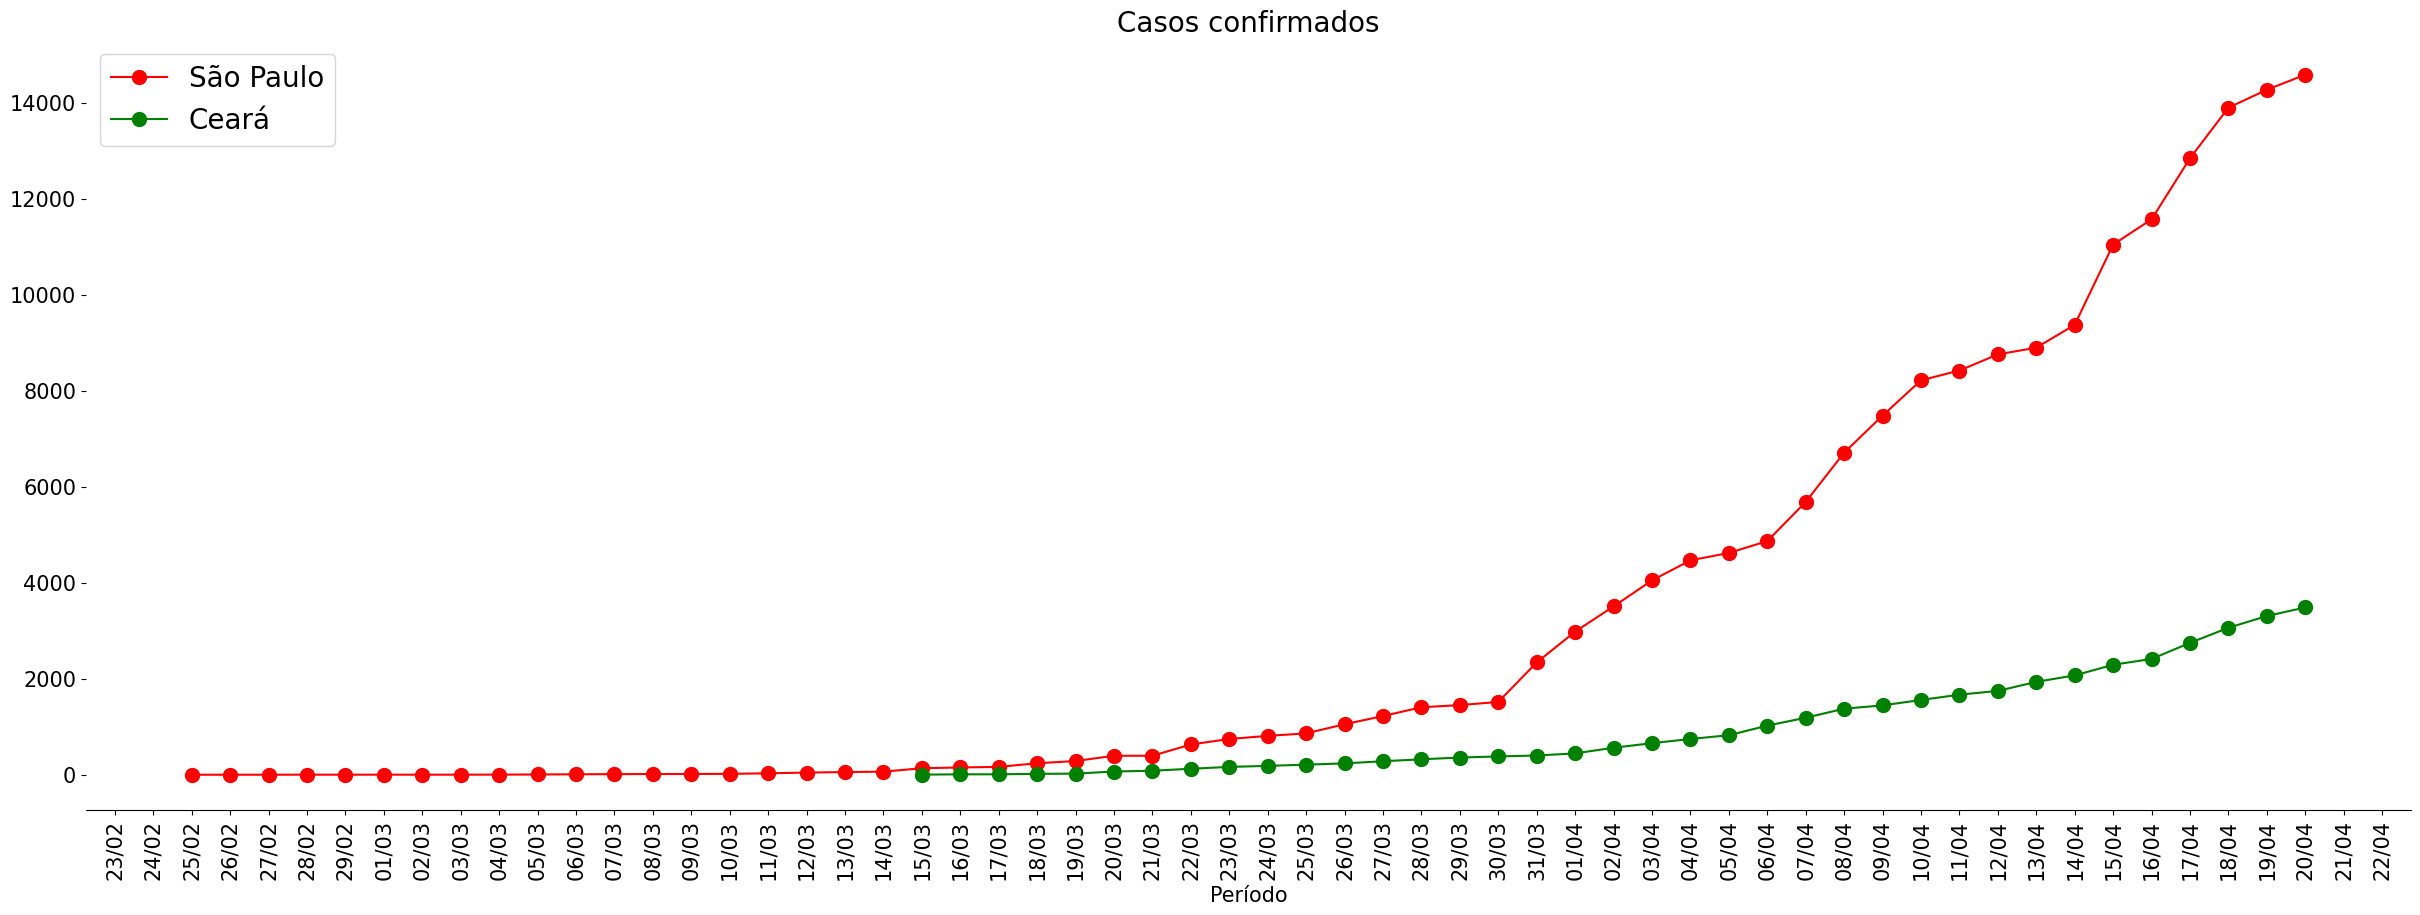

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
plt.style.use('default')

######## DATAS ########
#Ceará
dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosCE[i]['date'] for i in range(0, len(dadosCE))]]
casosCE = [dadosCE[i]['confirmed'] for i in range(0, len(dadosCE))]

# Mortes Ceará
dataCEDEATH = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosCE[i]['date'] for i in range(0, len(dadosCE))]]
casosCEDEATH = [dadosCE[i]['deaths'] for i in range(0, len(dadosCE))]

#Fortaleza
dataFTZ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosFTZ[i]['date'] for i in range(0, len(dadosFTZ))]]
casosFTZ = [dadosFTZ[i]['confirmed'] for i in range(0, len(dadosFTZ))]

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosSP[i]['date'] for i in range(0, len(dadosSP))]]
casosSP = [dadosSP[i]['confirmed'] for i in range(0, len(dadosSP))]


# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosRJ[i]['date'] for i in range(0, len(dadosRJ))]]
casosRJ = [dadosRJ[i]['confirmed'] for i in range(0, len(dadosRJ))]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosBR[i][0] for i in range(0, len(dadosBR))]]
casosBR = [dadosBR[i][2] for i in range(0, len(dadosBR))]
print(casosBR)

# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
#ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatar o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
#plt.ylabel('Número de casos confirmados', size = 15)
plt.title('Casos confirmados', size = 20)

# Inverte eixo-x
#plt.gca().invert_xaxis()

# Plota os dados SP, RJ e CE, respectivamente
plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
#plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataCEDEATH, casosCEDEATH, marker='o', markersize=10, color="red", label='Ceará Mortes')
#plt.plot(dataFTZ, casosFTZ, marker='o', markersize=10, color="black", label='Fortaleza')
#plt.plot(dataBR[::-1][0:], casosBR[::-1][0:], marker='o', markersize=10, color="indigo", label='Brasil')

'''
# Mostrar valores dos pontos do eixo Y para o Ceará
for i,j in zip(dataCE,casosCE):
    ax.annotate(str(j),xy=(i,j+20), ha="center", size=20)
    
for i,j in zip(dataCEDEATH[:dataCEDEATH.index(datetime.strptime("2020-03-25","%Y-%m-%d").date())],casosCEDEATH[:dataCEDEATH.index(datetime.strptime("2020-03-25","%Y-%m-%d").date())]):
    ax.annotate(str(j),xy=(i,j+10), ha="center", size=20)
'''

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.get_yaxis().set_ticks([])


# Ajusta o eixo x e gira os valores
ax.tick_params(axis='x', rotation=90)

plt.legend(loc='best', prop={"size":20})
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.2 - Impacto percentual de cada estado sobre os casos totais: 

[1.333, 3.226, 3.003, 3.696, 3.756, 6.996, 7.018, 7.842, 8.402, 8.204, 8.223, 7.926, 8.113, 8.142, 8.324, 8.192, 6.885, 6.42, 6.951, 7.143, 7.179, 7.213, 8.343, 8.436, 8.464, 7.942, 7.815, 7.946, 7.78, 8.107, 8.03, 7.895, 7.755, 7.986, 8.237, 8.434, 8.519]


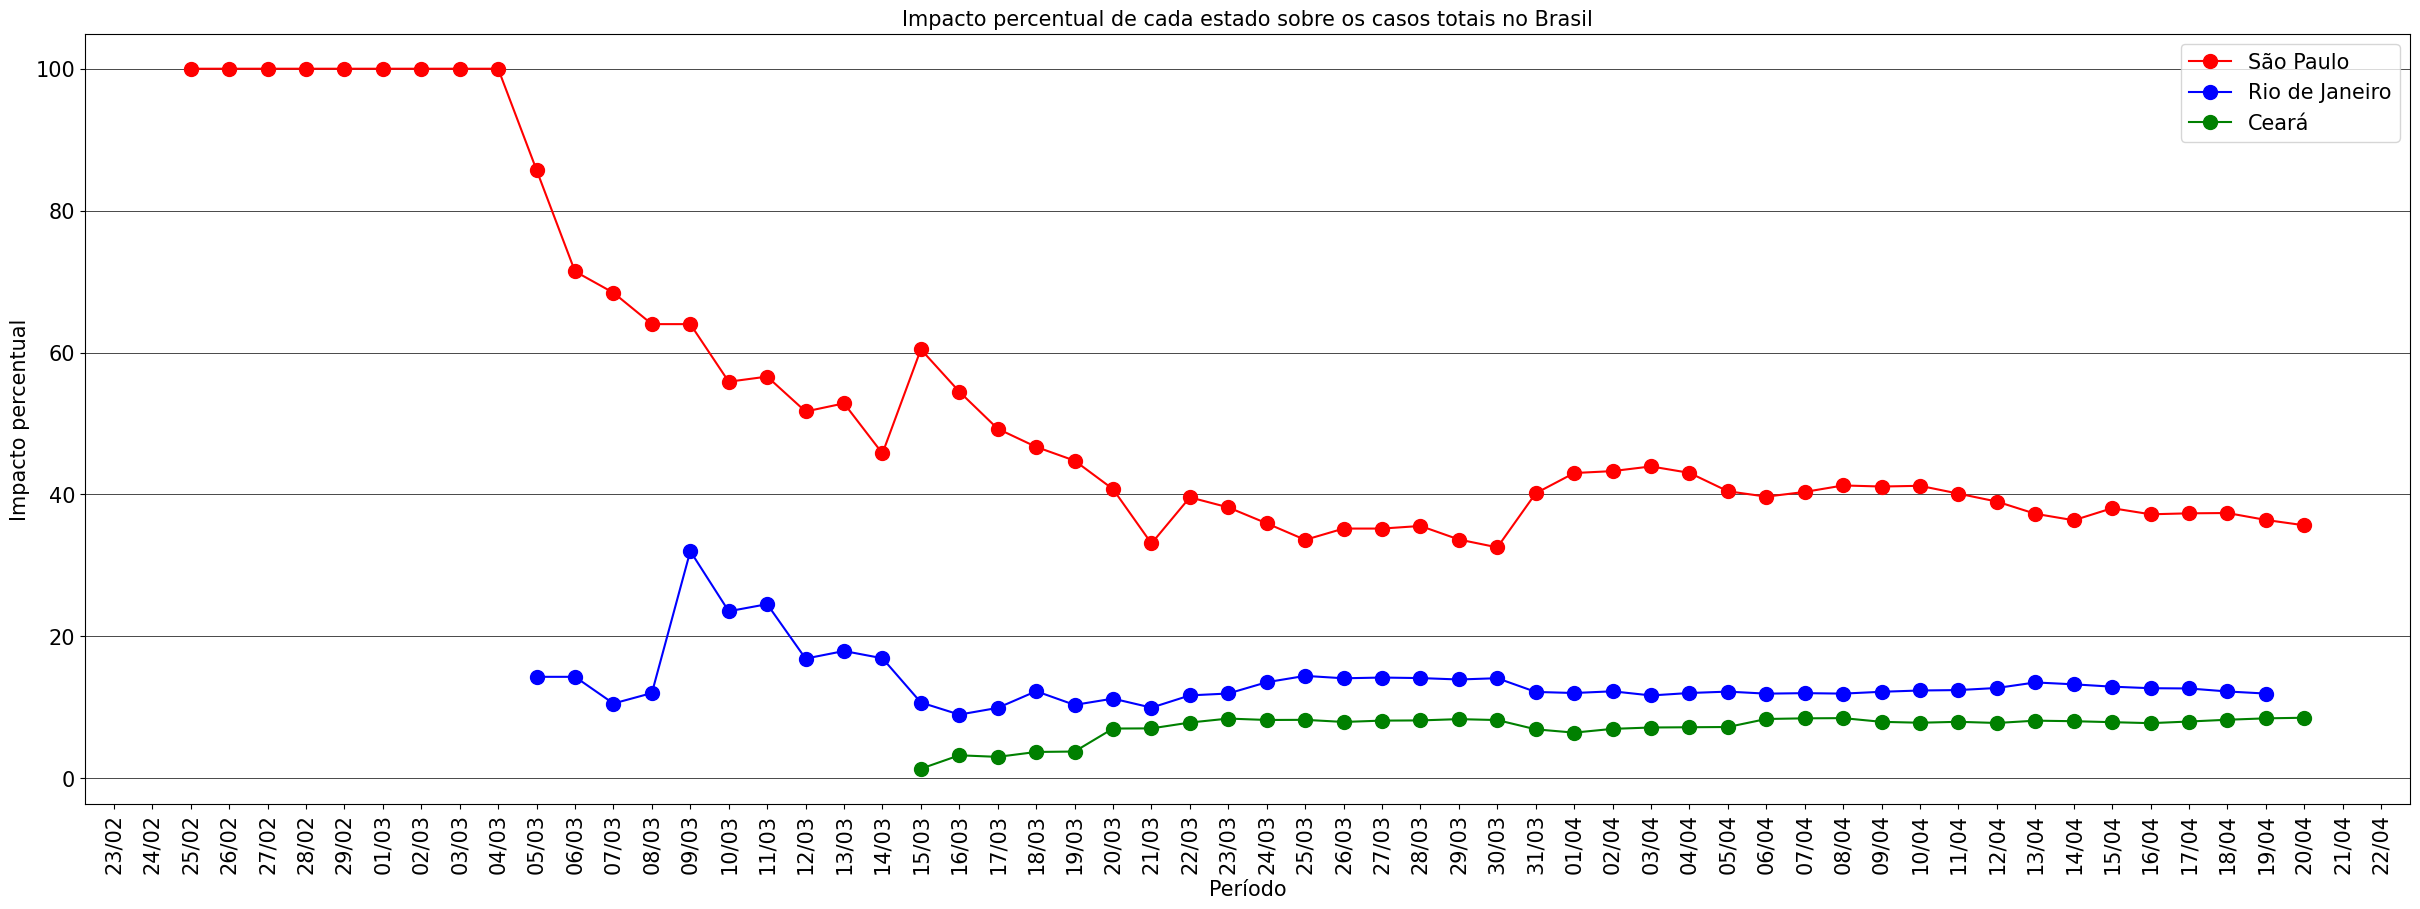

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Função para calcular o impacto percentual
def impacto_estado(dataestado, casosestado):
    data = []
    impacto = []
    combinacao = []
    for i in dataBR:
        for j in dataestado:
            if i==j:
                indexBR = dataBR.index(i)
                indexestado = dataestado.index(j)
                data.append(j)
                try:
                    impacto.append("{:.3f}".format(100*casosestado[indexestado]/casosBR[indexBR]))
                except ZeroDivisionError:
                    impacto.append(0)
                    
    combinacao.extend([list(i) for i in zip(data, impacto)])
    return(combinacao)
                
### Valores de impacto nos números totais de casos brasileiros    
impactosCE = impacto_estado(dataCE, casosCE)
impactosRJ = impacto_estado(dataRJ, casosRJ)
impactosSP = impacto_estado(dataSP, casosSP)


# Impacto CE
dataICE = [impactosCE[i][0] for i in range(0, len(impactosCE))]
casosICE = [float(impactosCE[i][1]) for i in range(0, len(impactosCE))]

# Impacto RJ
dataIRJ = [impactosRJ[i][0] for i in range(0, len(impactosRJ))]
casosIRJ = [float(impactosRJ[i][1]) for i in range(0, len(impactosRJ))]

# Impacto SP
dataISP = [impactosSP[i][0] for i in range(0, len(impactosSP))]
casosISP = [float(impactosSP[i][1]) for i in range(0, len(impactosSP))]

# Porcentagem dos impactos dos casos cearenses
print(casosICE)

# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatando o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Impacto percentual', size = 15)
plt.title('Impacto percentual de cada estado sobre os casos totais no Brasil', size = 15)


# Plota os dados SP, RJ e CE, respectivamente
plt.plot(dataISP, casosISP, marker='o', markersize=10, color="red", label='São Paulo')
plt.plot(dataIRJ, casosIRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataICE, casosICE, marker='o', markersize=10, color="green", label='Ceará')

# Eixo x rotacionado 90 graus
ax.tick_params(axis='x', rotation=90)

# Legenda
plt.legend(loc='best', prop={"size":15})
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.3 - Número de Casos Confirmados por 100 mil habitantes: 

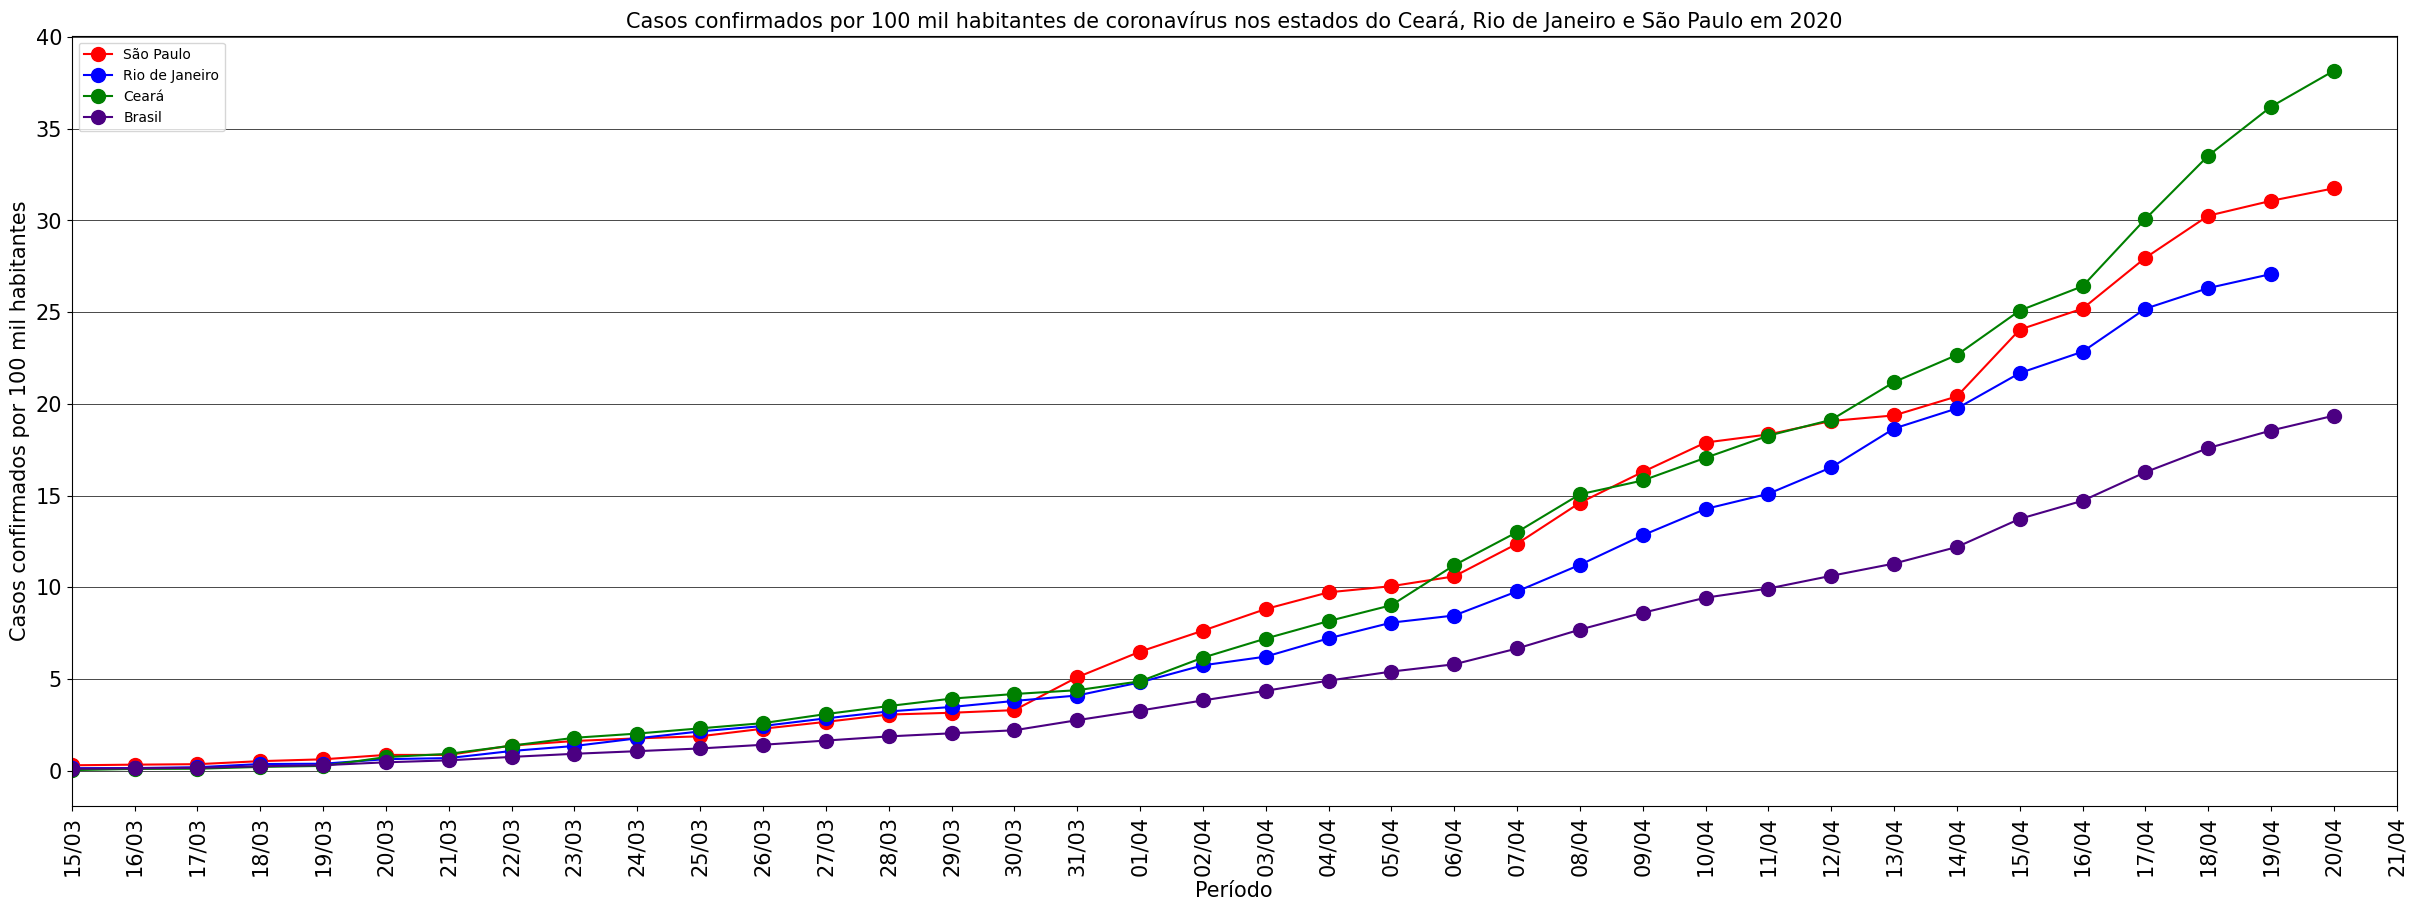

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates

# DATAS
#Ceará
dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosCE[i]['date'] for i in range(0, len(dadosCE))]]
casosCE = [dadosCE[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosCE))]

#Fortaleza
dataFTZ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosFTZ[i]['date'] for i in range(0, len(dadosFTZ))]]
casosFTZ = [dadosFTZ[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosFTZ))]

#São Paulo Capital
dataSPZ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosSPZ[i]['date'] for i in range(0, len(dadosSPZ))]]
casosSPZ = [dadosSPZ[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosSPZ))]

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosSP[i]['date'] for i in range(0, len(dadosSP))]]
casosSP = [dadosSP[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosSP))]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosRJ[i]['date'] for i in range(0, len(dadosRJ))]]
casosRJ = [dadosRJ[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosRJ))]

# Distrito Federal
dataDF = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosDF[i]['date'] for i in range(0, len(dadosDF))]]
casosDF = [dadosDF[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosDF))]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosBR[i][0] for i in range(0, len(dadosBR))]]
casosBR = [dadosBR[i][5] for i in range(0, len(dadosBR))]


# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Ajustando os limites do gráfico
ax.set(xlim=(datetime.strptime('2020-03-15', '%Y-%m-%d').date(), datetime.now().date()))

# Linhas horizontais no eixo y
ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatando o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Casos confirmados por 100 mil habitantes', size = 15)
plt.title('Casos confirmados por 100 mil habitantes de coronavírus nos estados do Ceará, Rio de Janeiro e São Paulo em 2020', size = 15)


# Plota os dados SP, RJ e CE, respectivamente
plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataFTZ, casosFTZ, marker='o', markersize=10, color="black", label='Fortaleza')
#plt.plot(dataSPZ, casosSPZ, marker='o', markersize=10, color="yellow", label='São Paulo Capital')
#plt.plot(dataDF, casosDF, marker='o', markersize=10, color="pink", label='Distrito Federal')
plt.plot(dataBR[::-1], casosBR[::-1], marker='o', markersize=10, color="indigo", label='Brasil')

ax.tick_params(axis='x', rotation=90)

plt.legend(loc='best')
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.4 - Taxa de mortalidade (%):

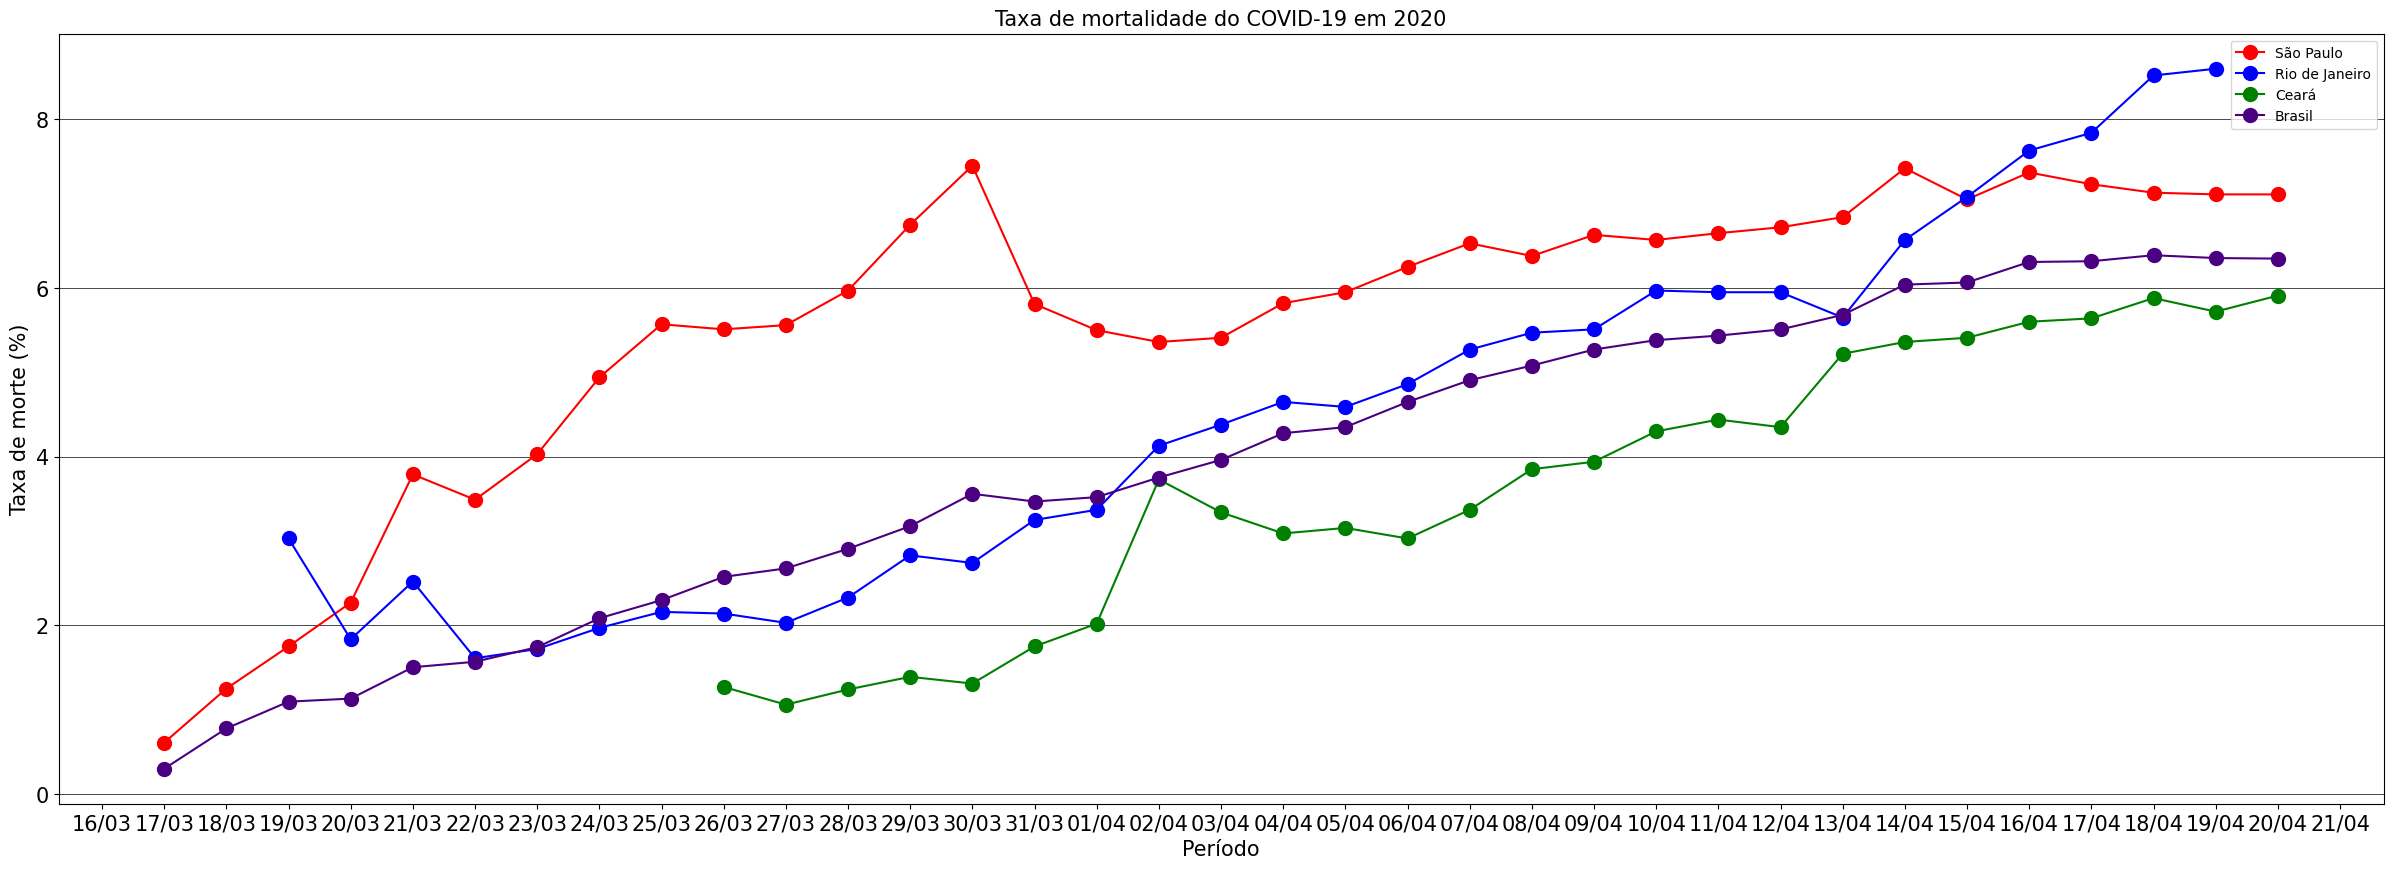

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates

# DATAS
#Ceará
dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosCE[i]['date'] for i in range(0, len(dadosCE)) if dadosCE[i]['death_rate']!=None]]
casosCE = [100*dadosCE[i]['death_rate'] for i in range(0, len(dadosCE)) if dadosCE[i]['death_rate']!=None]


# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosSP[i]['date'] for i in range(0, len(dadosSP)) if dadosSP[i]['death_rate']!=None]]
casosSP = [100*dadosSP[i]['death_rate'] for i in range(0, len(dadosSP)) if dadosSP[i]['death_rate']!=None]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosRJ[i]['date'] for i in range(0, len(dadosRJ)) if dadosRJ[i]['death_rate']!=None]]
casosRJ = [100*dadosRJ[i]['death_rate'] for i in range(0, len(dadosRJ)) if dadosRJ[i]['death_rate']!=None]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosBR[i][0] for i in range(0, len(dadosBR)) if dadosBR[i][6]!=0]]
casosBR = [100*dadosBR[i][9] for i in range(0, len(dadosBR)) if dadosBR[i][6]!=0]

# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatar o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Taxa de morte (%)', size = 15)
plt.title('Taxa de mortalidade do COVID-19 em 2020', size = 15)

# Inverte eixo-x
#plt.gca().invert_xaxis()

# Plota os dados SP, RJ e CE, respectivamente
plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
plt.plot(dataBR[::-1], casosBR[::-1], marker='o', markersize=10, color="indigo", label='Brasil')

# Deixa informacoes do eixo x paralelo ao eixo
ax.tick_params(axis='x', rotation=0)

plt.legend(loc='best')
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.5 - Crescimento percentual do número de casos (%)

[5.41, 7.97, 11.47, 13.89, 5.28, 10.68, 6.98, 10.76, 4.74, 7.06, 7.82, 5.01, 15.82, 16.13, 24.15, 10.6, 13.22, 16.87, 26.52, 10.97, 4.97, 6.41, 11.49, 14.18, 18.99, 12.32, 14.05, 12.8, 31.2, 48.81, 23.53, 183.33, 26.32, 90.0, 11.11, 200.0, 0.0]


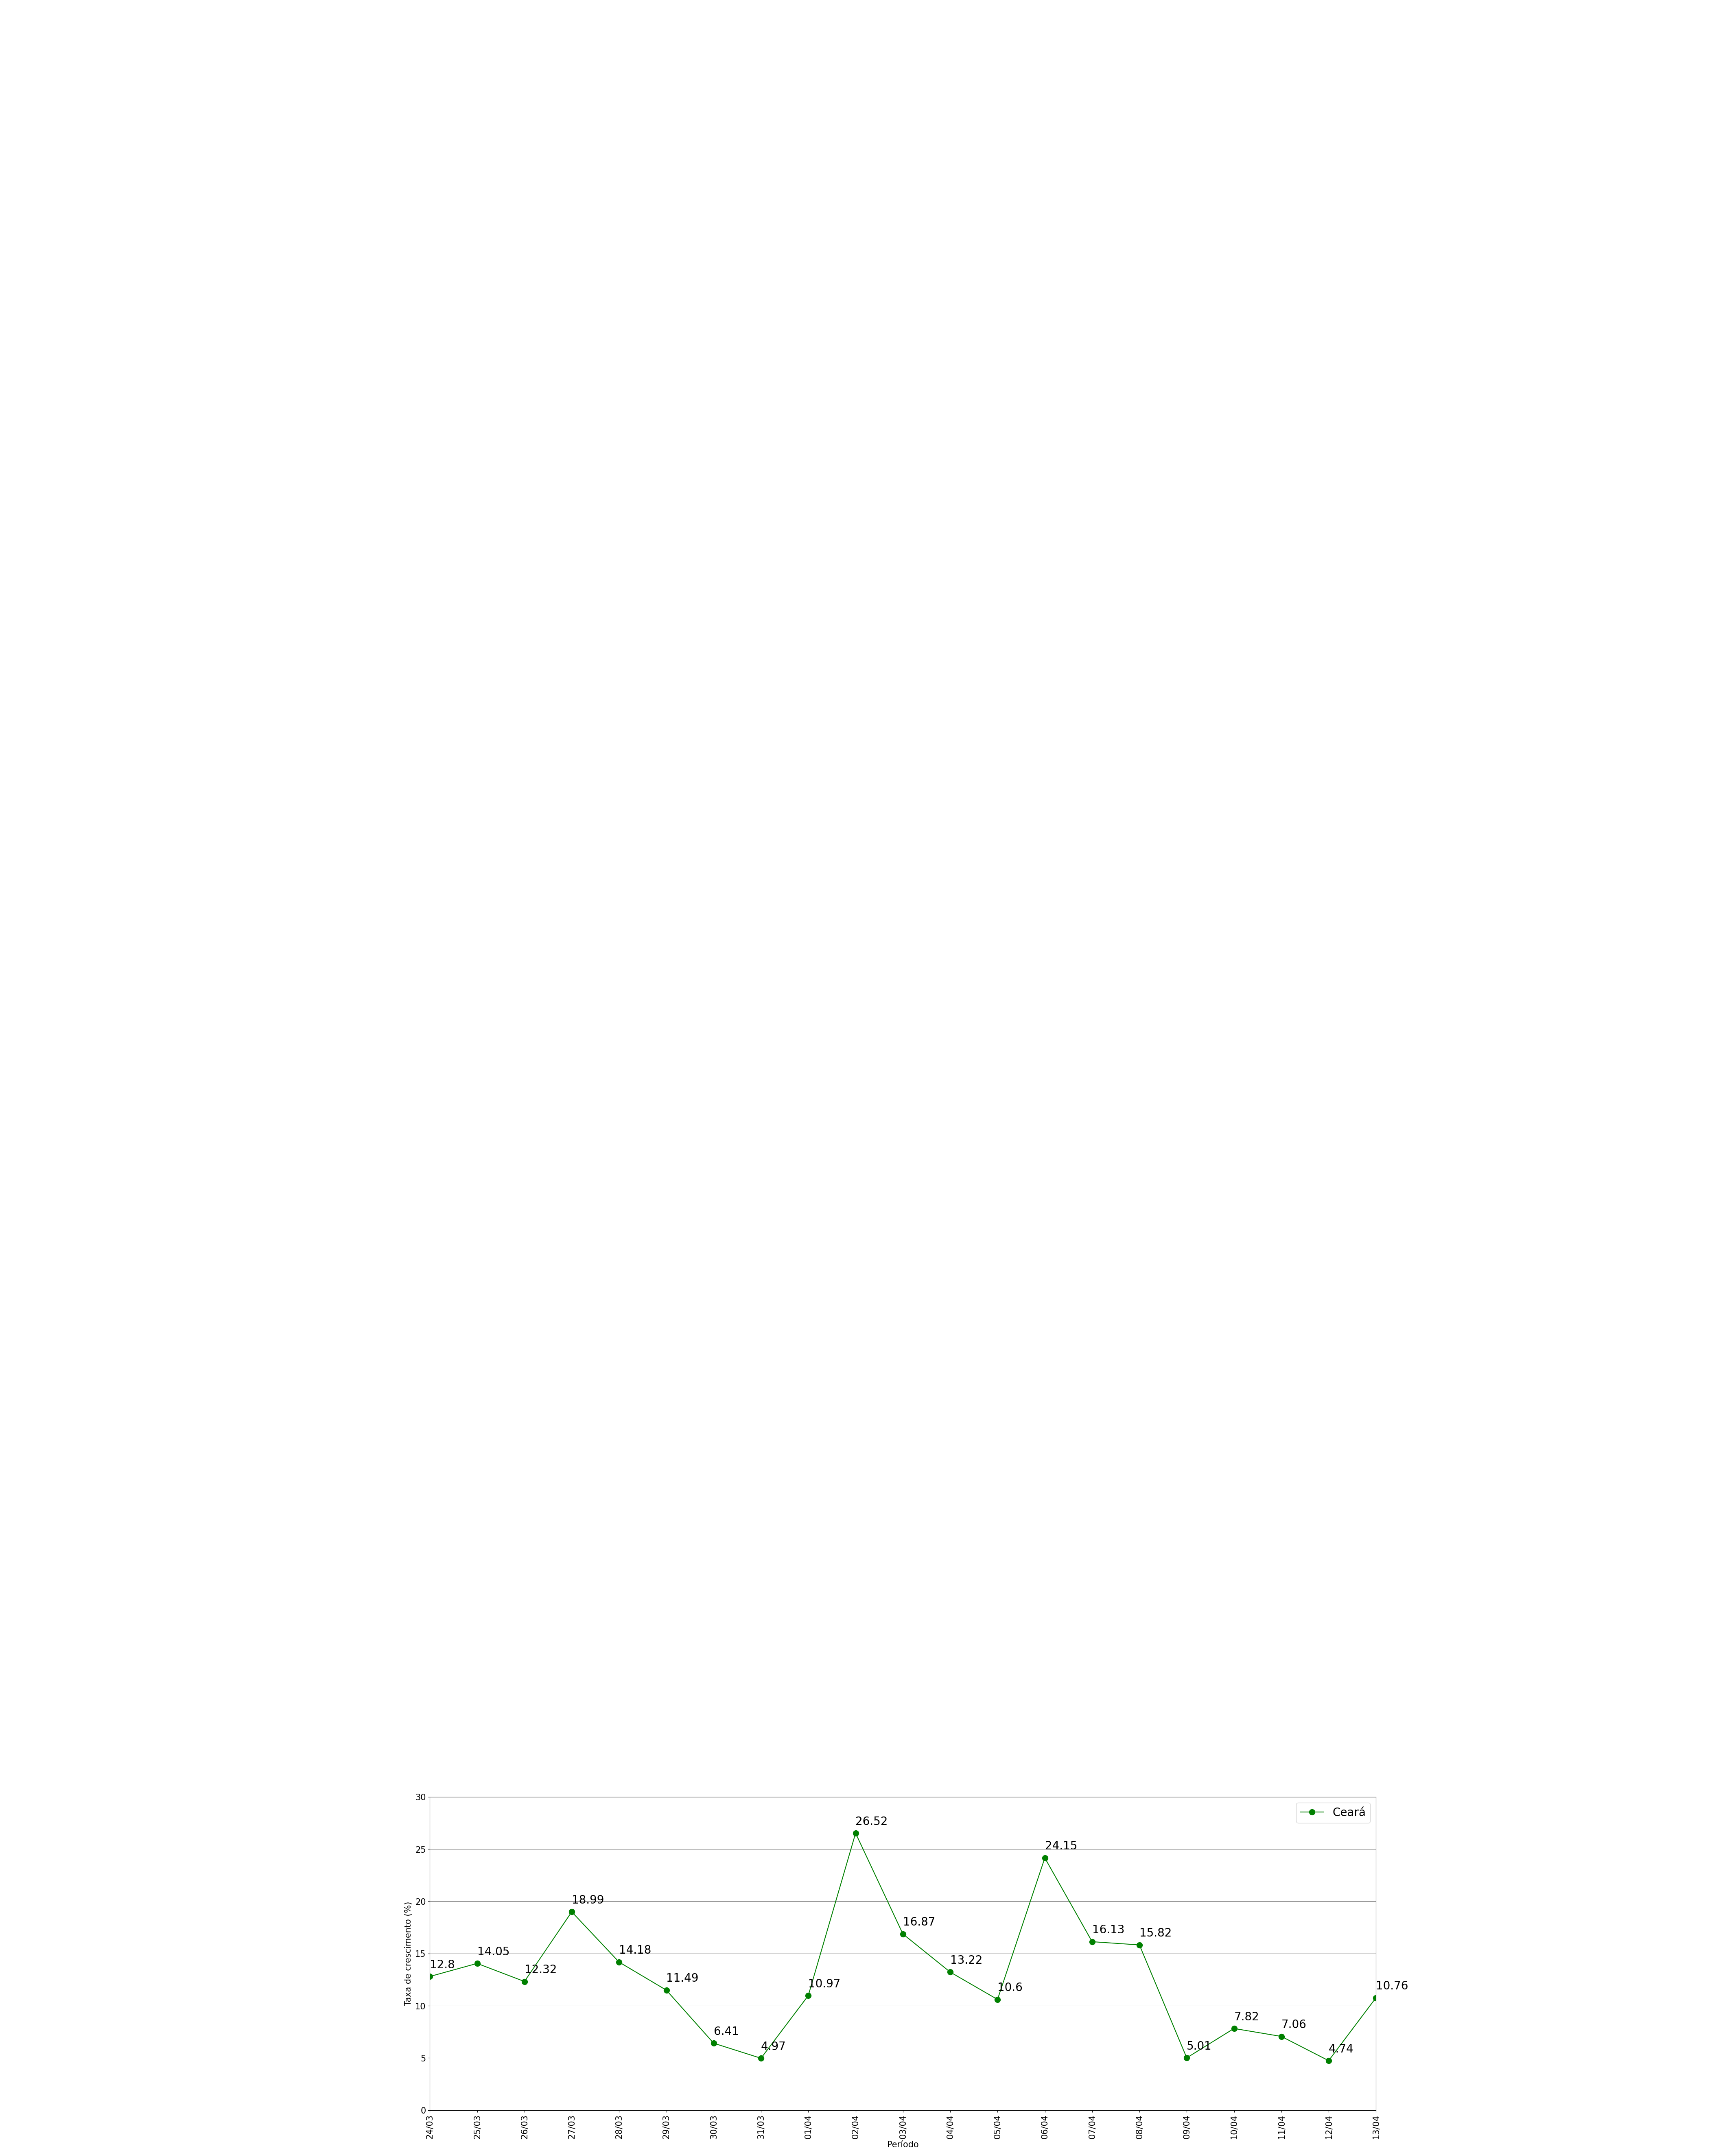

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates
from time import mktime
from adjustText import adjust_text

# DATAS
#Ceará
crescimentoCE = taxa_crescimento(dadosCE)
crescimentoSP = taxa_crescimento(dadosSP)                       
crescimentoRJ = taxa_crescimento(dadosRJ)


dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoCE[i][0] for i in range(0, len(crescimentoCE))]]
casosCE = [float(crescimentoCE[i][3]) for i in range(0, len(crescimentoCE))]

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoSP[i][0] for i in range(0, len(crescimentoSP))]]
casosSP = [float(crescimentoSP[i][3]) for i in range(0, len(crescimentoSP))]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoRJ[i][0] for i in range(0, len(crescimentoRJ))]]
casosRJ = [float(crescimentoRJ[i][3]) for i in range(0, len(crescimentoRJ))]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoBR[i][0] for i in range(0, len(crescimentoBR))]]
casosBR = [float(crescimentoBR[i][1]) for i in range(0, len(crescimentoBR))]

print(casosCE)


# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatar o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Limite para eixo x e y
ax.set(xlim=(datetime.strptime('2020-03-24', '%Y-%m-%d').date(), datetime.strptime('2020-04-13', '%Y-%m-%d').date()))
ax.set_ylim([0,30])

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Taxa de crescimento (%)', size = 15)
#plt.title('Percentual do crescimento nos casos confirmados de COVID-19 no Ceará', size = 15)


# Plota os dados SP, RJ e CE, respectivamente
#plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
#plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataBR, casosBR, marker='o', markersize=10, color="indigo", label='Brasil')

# Mostrar valores dos pontos do eixo Y para o Ceará
for i,j in zip(dataCE,casosCE):
    if i in [datetime.strptime("2020-03-17","%Y-%m-%d").date(),
            datetime.strptime("2020-03-19","%Y-%m-%d").date(),
            datetime.strptime("2020-03-21","%Y-%m-%d").date()]:
        ax.annotate(str(j),xy=(i,j), xytext=(15,0), textcoords='offset points', size=20)
    else:    
        ax.annotate(str(j),xy=(i,j), xytext=(0,15), textcoords='offset points', size=20)


ax.tick_params(axis='x', rotation=90)



plt.legend(loc='best', prop={"size":20})
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

[5.41, 7.97, 11.47, 13.89, 5.28, 10.68, 6.98, 10.76, 4.74, 7.06, 7.82, 5.01, 15.82, 16.13, 24.15, 10.6, 13.22, 16.87, 26.52, 10.97, 4.97, 6.41, 11.49, 14.18, 18.99, 12.32, 14.05, 12.8, 31.2, 48.81, 23.53, 183.33, 26.32, 90.0, 11.11, 200.0, 0.0]


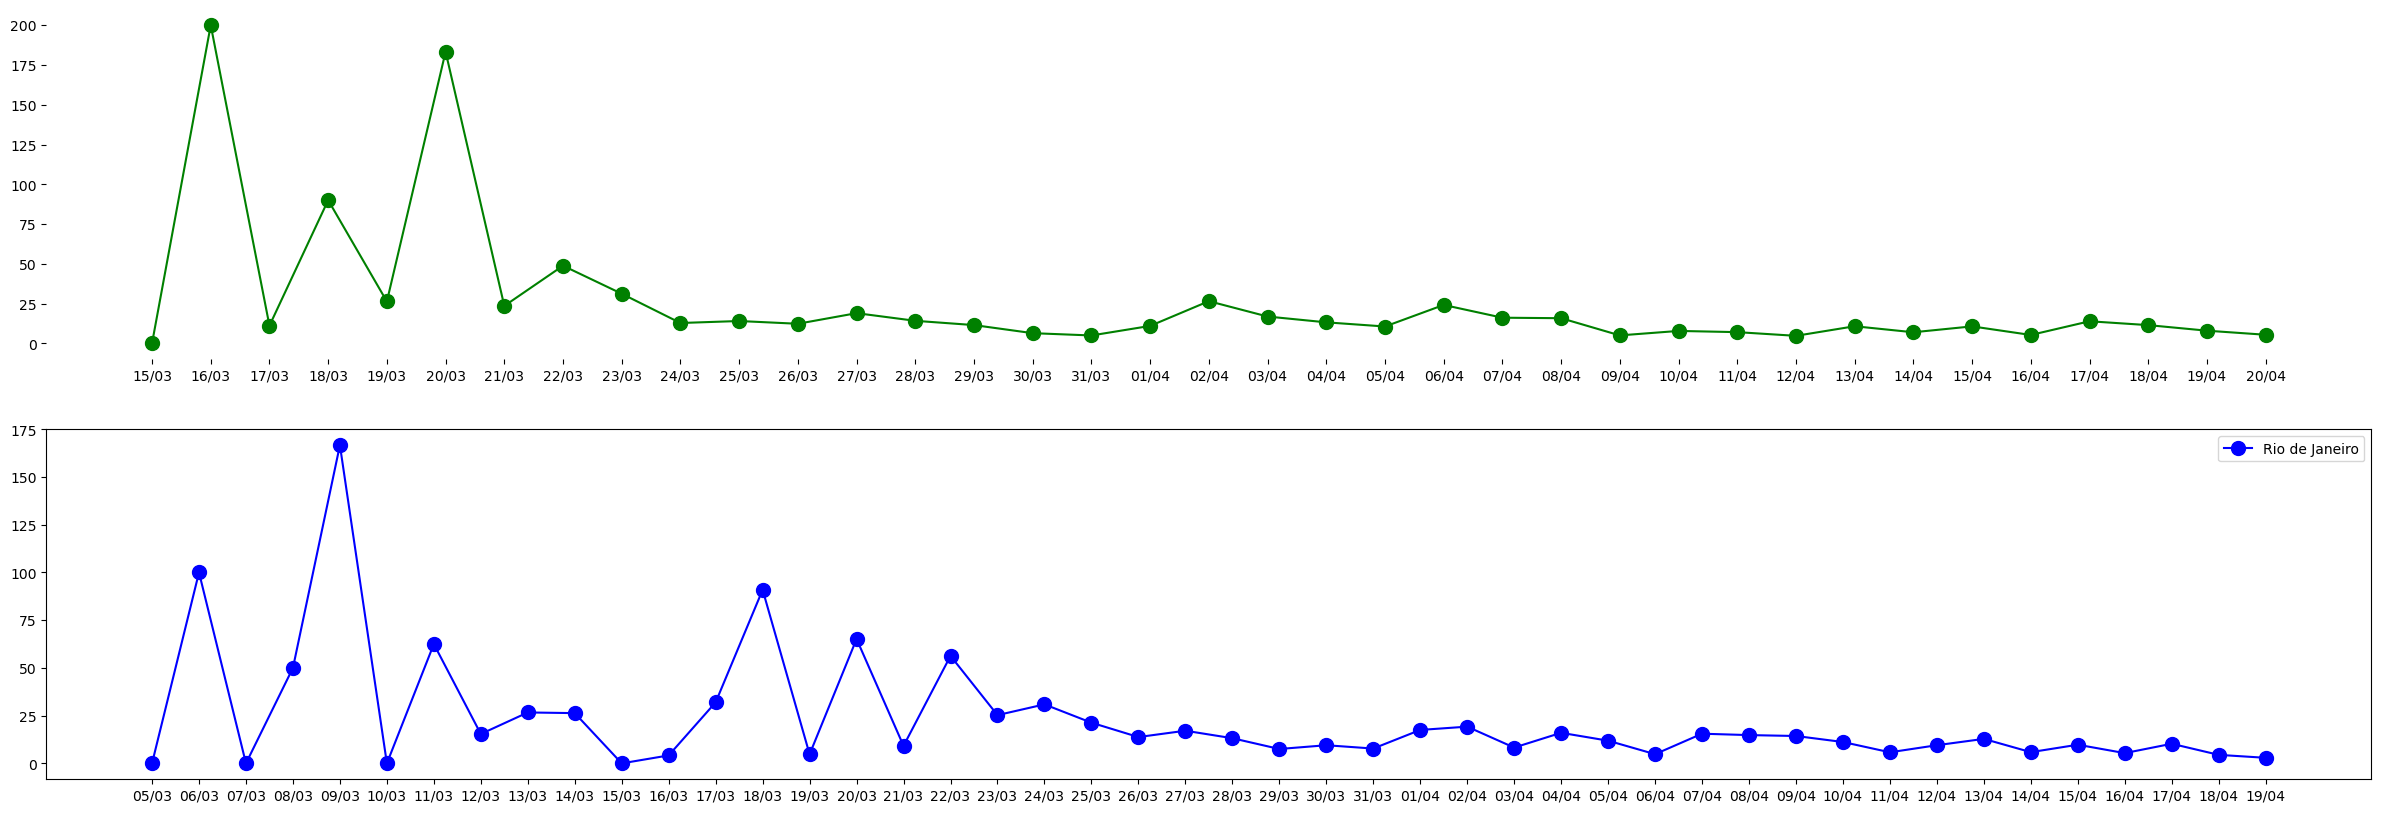

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates

# DATAS
#Ceará
crescimentoCE = taxa_crescimento(dadosCE)
crescimentoSP = taxa_crescimento(dadosSP)                       
crescimentoRJ = taxa_crescimento(dadosRJ)


dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoCE[i][0] for i in range(0, len(crescimentoCE))]]
dataCE = [r'{}/{}'.format(d,m) for y, m, d in map(lambda x: str(x).split('-'), dataCE)]
casosCE = [float(crescimentoCE[i][3]) for i in range(0, len(crescimentoCE))]

print(casosCE)

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoSP[i][0] for i in range(0, len(crescimentoSP))]]
dataSP = [r'{}/{}'.format(d,m) for y, m, d in map(lambda x: str(x).split('-'), dataSP)]
casosSP = [float(crescimentoSP[i][3]) for i in range(0, len(crescimentoSP))]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoRJ[i][0] for i in range(0, len(crescimentoRJ))]]
dataRJ = [r'{}/{}'.format(d,m) for y, m, d in map(lambda x: str(x).split('-'), dataRJ)]
casosRJ = [float(crescimentoRJ[i][3]) for i in range(0, len(crescimentoRJ))]

# Brasil
#dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosBR[i][0] for i in range(0, len(dadosBR))]]
#dataBR = [r'{}/{}'.format(d,m,y) for y, m, d in map(lambda x: str(x).split('-'), dataBR)]
#casosBR = [dadosBR[i][7] for i in range(0, len(dadosBR))]

#print(dataCE)
#print(casosCE)
#print(dataSP)
#print(casosSP)
#print(dataRJ)


# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(2, figsize=(30,10))

# Linhas horizontais no eixo y
#ax[0][0].yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
#plt.yticks(size = 15)
#plt.xticks(size = 15)

# Definindo textos do título, eixo x e eixo y
#plt.xlabel('Período', size = 15)
#plt.ylabel('Taxa de crescimento (%)', size = 15)
#plt.title('Percentual do crescimento nos casos confirmados de COVID-19 no Ceará', size = 15)

# Inverte eixo-x
ax[0].invert_xaxis()
ax[1].invert_xaxis()

#fig,a =  plt.subplots(2,2)


# Plota os dados SP, RJ e CE, respectivamente
#plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
ax[1].plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
ax[0].plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataBR[::-1], casosBR[::-1], marker='o', markersize=10, color="indigo", label='Brasil')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)



plt.legend(loc='best')
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.6 - Número absoluto de novos casos:

[179.0, 244.0, 315.0, 335.0, 121.0, 221.0, 135.0, 188.0, 79.0, 110.0, 113.0, 69.0, 188.0, 165.0, 199.0, 79.0, 87.0, 95.0, 118.0, 44.0, 19.0, 23.0, 37.0, 40.0, 45.0, 26.0, 26.0, 21.0, 39.0, 41.0, 16.0, 44.0, 5.0, 9.0, 1.0, 6.0, 3.0]


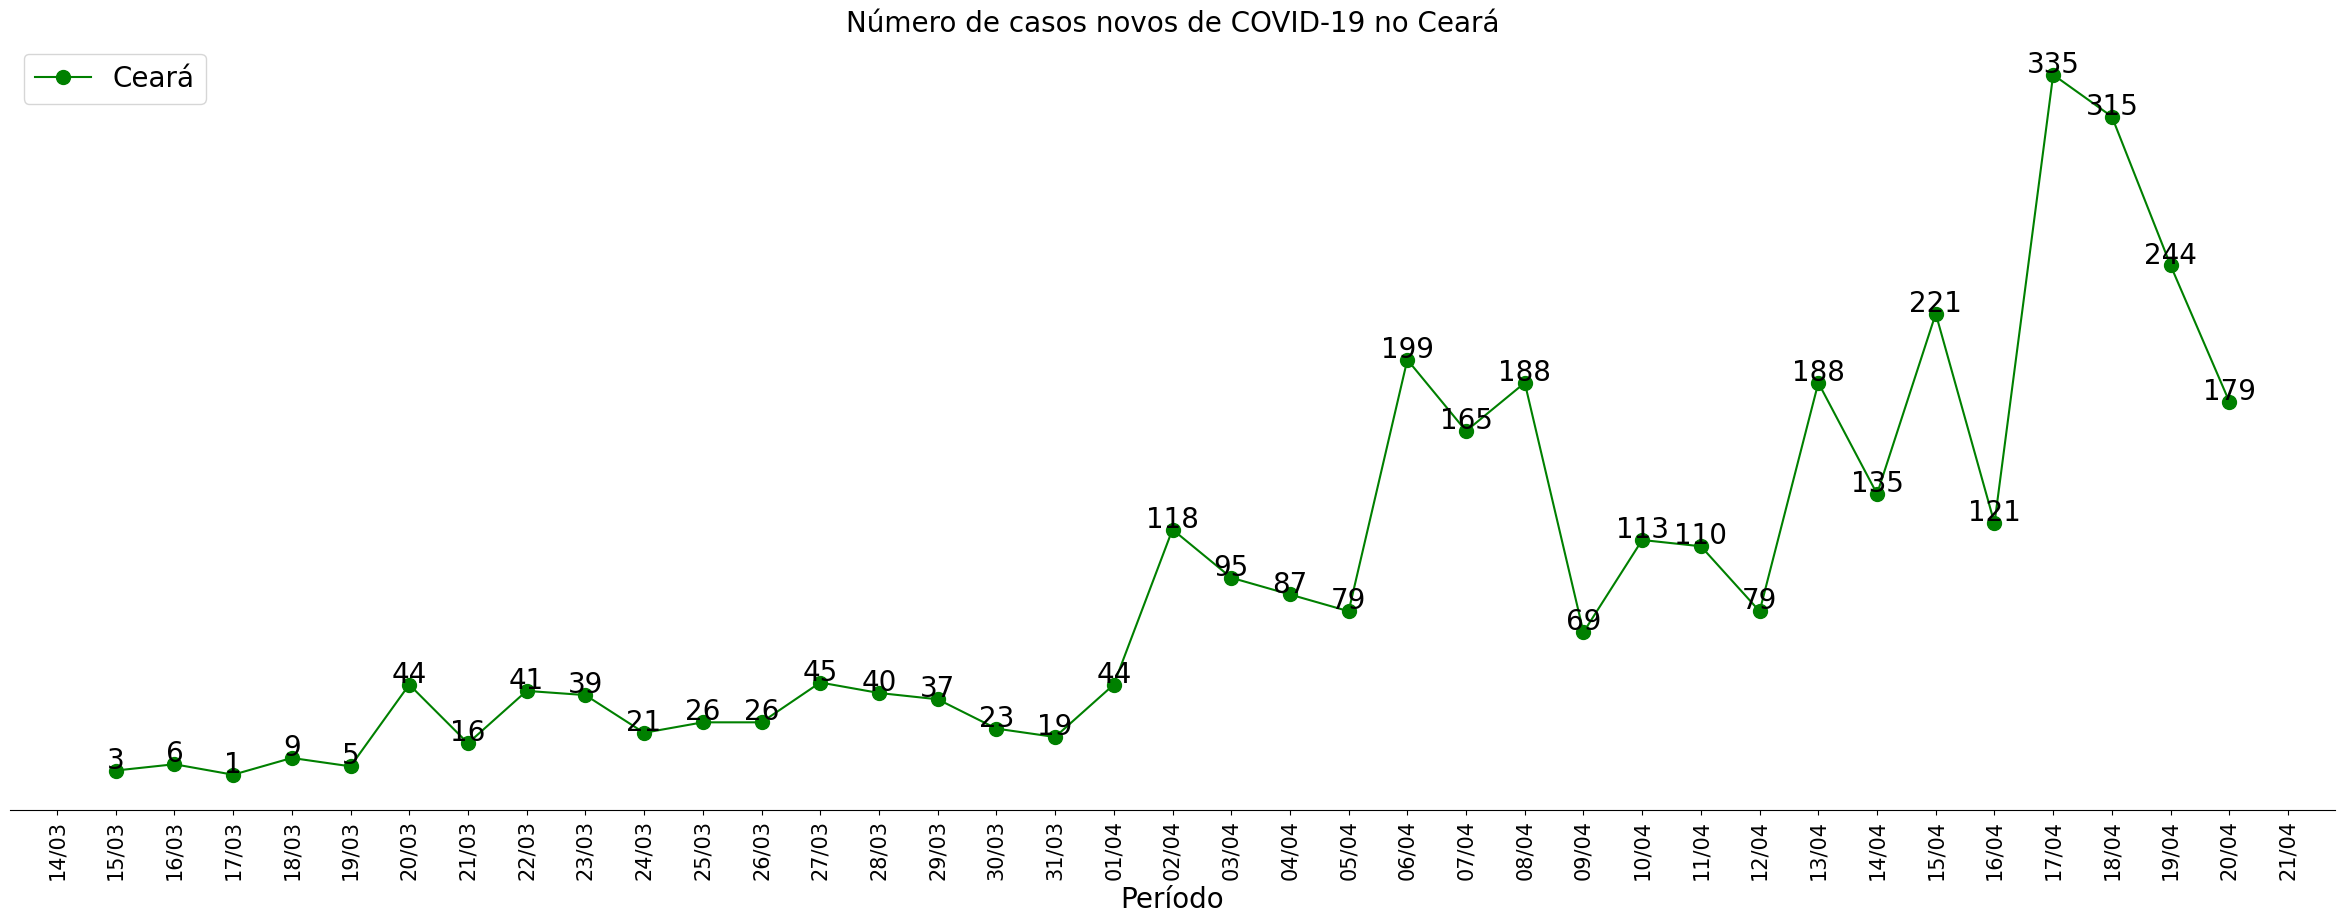

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt
import matplotlib.dates
from time import mktime

# DATAS
#Ceará
crescimentoCE = taxa_crescimento(dadosCE)
crescimentoSP = taxa_crescimento(dadosSP)                       
crescimentoRJ = taxa_crescimento(dadosRJ)


dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoCE[i][0] for i in range(0, len(crescimentoCE))]]
casosCE = [float(crescimentoCE[i][2]) for i in range(0, len(crescimentoCE))]

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoSP[i][0] for i in range(0, len(crescimentoSP))]]
casosSP = [float(crescimentoSP[i][2]) for i in range(0, len(crescimentoSP))]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoRJ[i][0] for i in range(0, len(crescimentoRJ))]]
casosRJ = [float(crescimentoRJ[i][2]) for i in range(0, len(crescimentoRJ))]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoBR[i][0] for i in range(0, len(crescimentoBR))]]
casosBR = [float(crescimentoBR[i][2]) for i in range(0, len(crescimentoBR))]

print(casosCE)


# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
#ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatar o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Limite para eixo y
#ax.set_ylim([0,60])

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 20)
#plt.ylabel('Número de casos novos', size = 15)
plt.title('Número de casos novos de COVID-19 no Ceará', size = 20)


# Find position of a date in a list
#print(dataBR.index(datetime.strptime("2020-03-15","%Y-%m-%d").date()))

# Plota os dados SP, RJ e CE, respectivamente
#plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
#plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataBR, casosBR, marker='o', markersize=10, color="indigo", label='Brasil')



# Mostrar valores dos pontos do eixo Y para o Ceará
for i,j in zip(dataCE,casosCE):
    ax.annotate(str(int(j)),xy=(i,j+5), ha="center", va="center", size=20)

'''
# Mostrar valores dos pontos do eixo Y para no BR
for i,j in zip(dataBR,casosBR):
    ax.annotate(str(j),xy=(i,j+3), size=17)

'''

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

ax.tick_params(axis='x', rotation=90)





plt.legend(loc='upper left', prop={"size":20})
plt.savefig('foo.png', format='png', dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

#### Outros países:

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


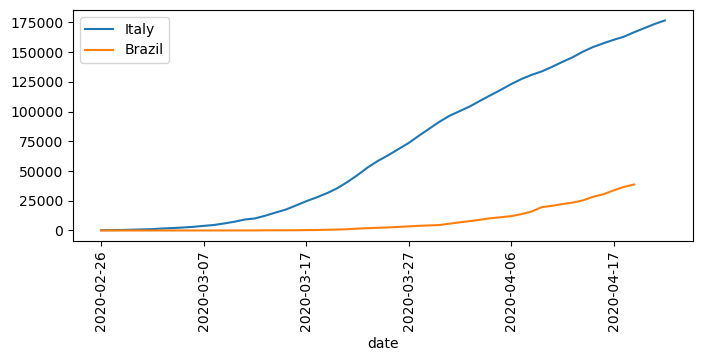

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
import matplotlib.dates
from time import mktime
import matplotlib.dates as mdates
df = pd.read_csv('https://coronadatascraper.com/timeseries.csv')

fig, ax = plt.subplots(figsize=(8,3))

# gca stands for 'get current axis'
ax = plt.gca()

df2 = df[(df['country']=='Italy') & (df['level']=='country')]
df3 = df[(df['country']=='Brazil') & (df['level']=='country') & (df['cases']>0)]


df2.plot(x ='date', y='cases',label='Italy', ax=ax)
df3.plot(x ='date', y='cases',label='Brazil', ax=ax)

ax.tick_params(axis='x', rotation=90)



plt.show()

#df2

#### COMPARAÇÃO ENTRE PAÍSES

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


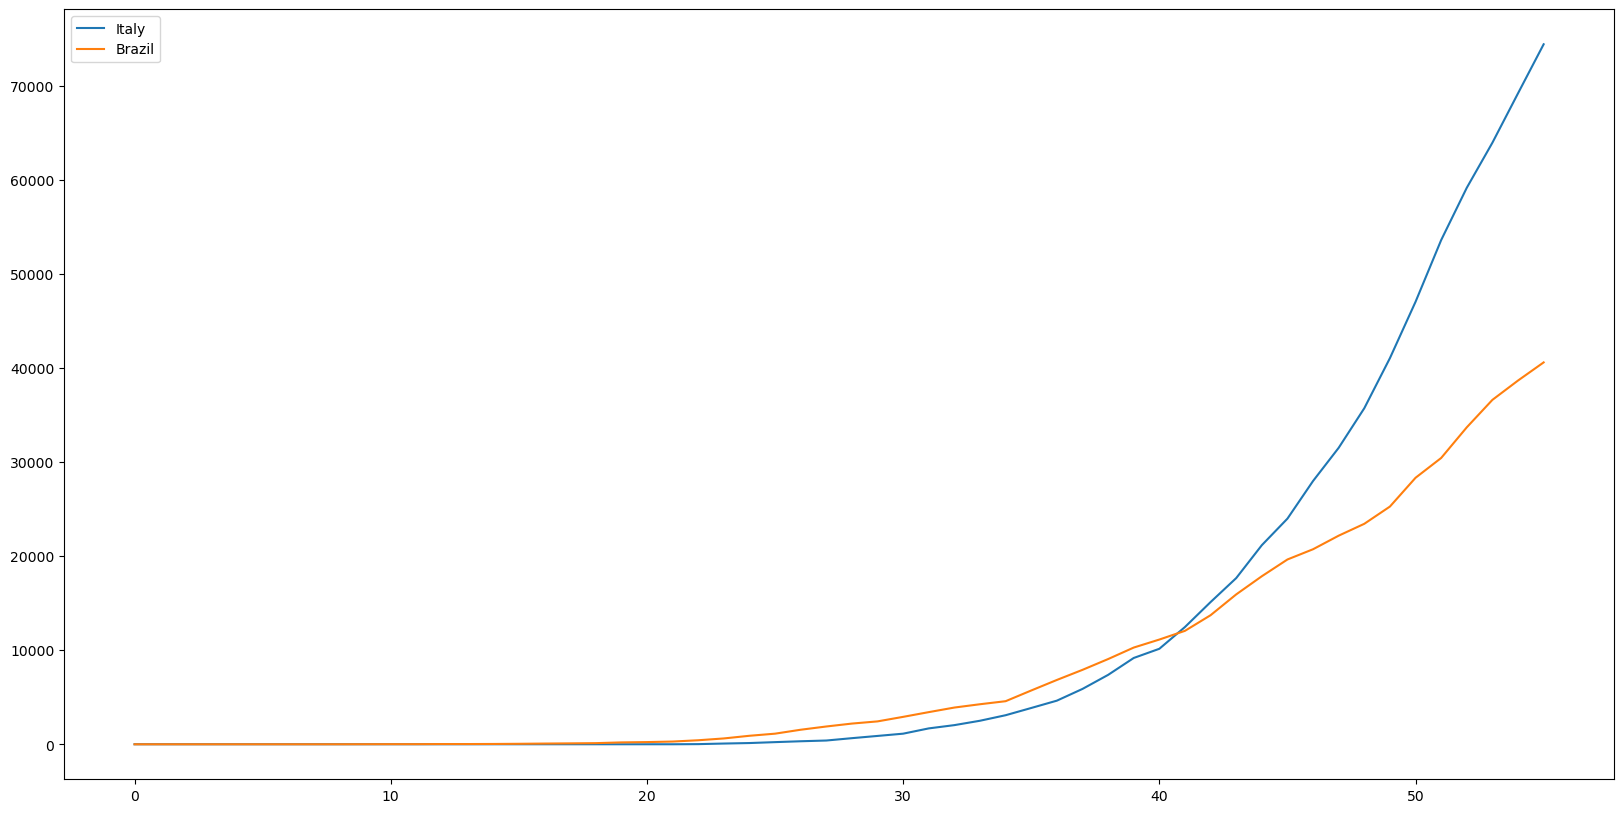

In [17]:
import pandas as pd

dte2 = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/total_cases.csv')

df212 = dte2[['Italy', 'Brazil']] 


fig, ax = plt.subplots(figsize=(20,10))

# gca stands for 'get current axis'
ax = plt.gca()


#df212['Italy'].drop([0,1,2,3,4,5,6,7,8,9])
df212['Italy'] = df212['Italy'].shift(-31)
df212['Brazil'] = df212['Brazil'].shift(-57)
df212 = df212.dropna()
 

df212.plot(y='Italy',label='Italy', ax=ax)
df212.plot(y='Brazil',label='Brazil', ax=ax)


#### Rascunho

In [18]:
# df = modificado['municipioPaciente'].value_counts().rename_axis('unique_values').reset_index(name='counts')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)


# Comparativo com mundo

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


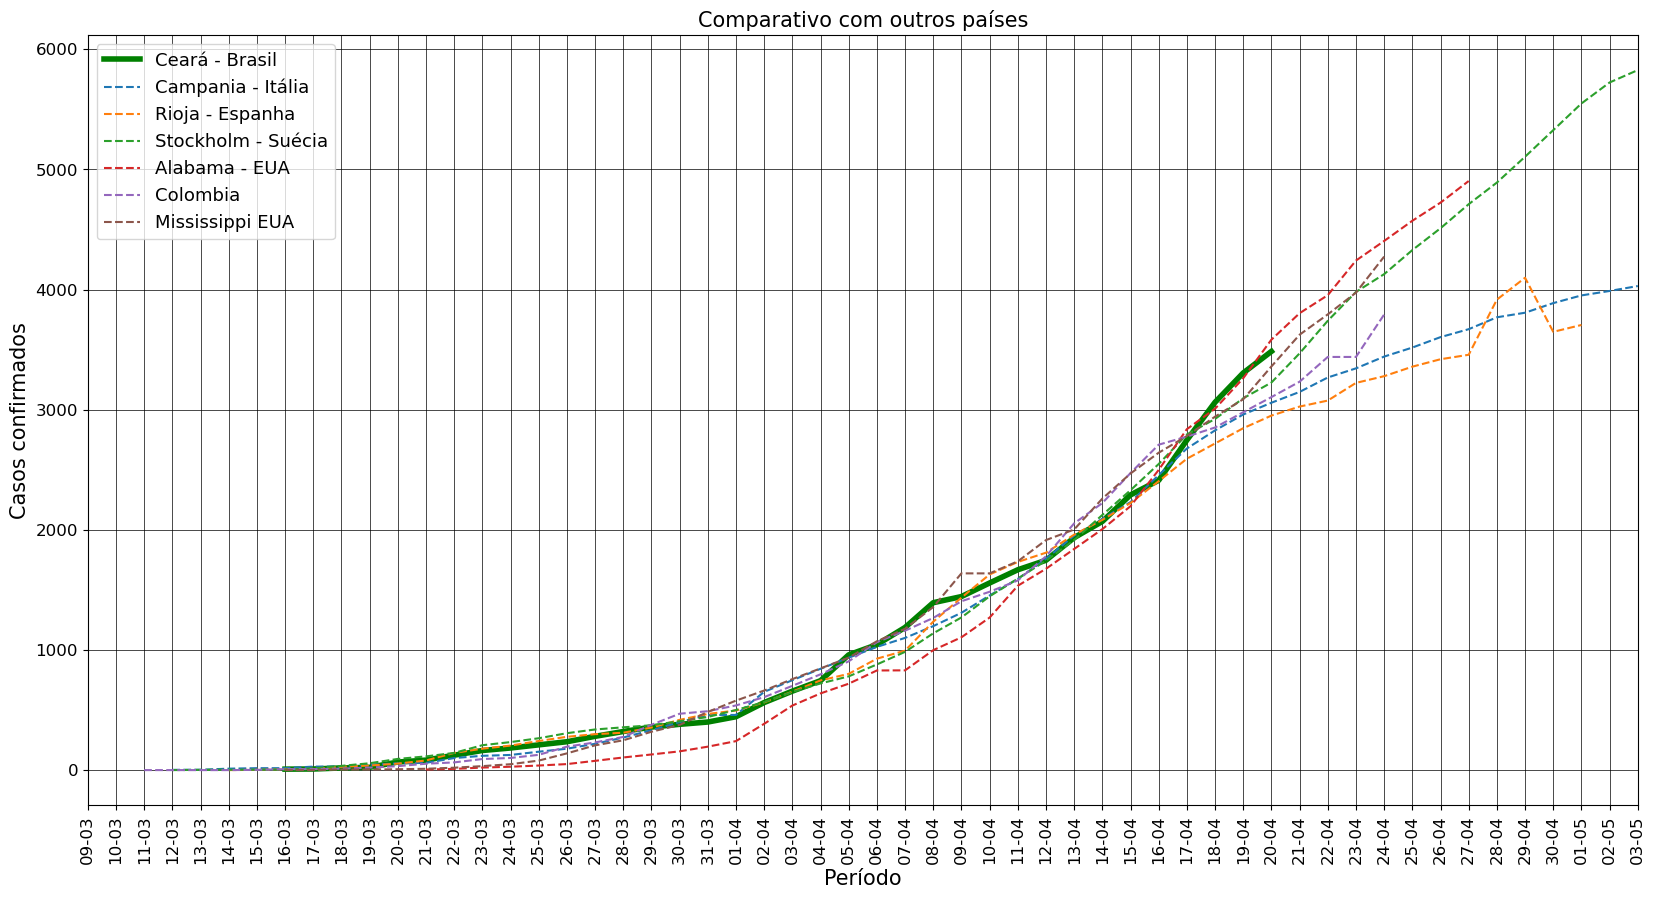

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Baixar dados
# Tirar descricao quando for baixar
df = pd.read_csv('https://coronadatascraper.com/timeseries.csv')
df2 = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
df2 = df2[(df2['state']=='CE') & (df2['place_type']=='state')]


# Dados do Ceará - Brazil
# ceara2 = df[(df['country'] == 'Brazil') & (df['state'] == 'Ceará')]
ceara = df2.reset_index()

# Dados Campania - Italy
campania = df[(df['country'] == 'Italy') & (df['state'] == 'Campania')]
campania = campania.reset_index()

# Dados Rioja - Spain
rioja = df[(df['country'] == 'Spain') & (df['state'] == 'Rioja')]
rioja = rioja.reset_index()

# Stockholm
stock = df[(df['country'] == 'Sweden') & (df['state'] == 'Stockholm County')]
stock = stock.reset_index()

# Alabama
alabama = df[(df['country'] == 'United States') & (df['state'] == 'Alabama') & (df['level'] == 'state')]
alabama = alabama.reset_index()

# Colombia
colombia = df[(df['country'] == 'Colombia') & (df['level'] == 'country')]
colombia = colombia.reset_index()

# Missipi
miss = df[(df['country'] == 'United States') & (df['state'] == 'Mississippi') & (df['level'] == 'state')]
miss = miss.reset_index()

# Ajustando tamanho gráfico
fig, ax = plt.subplots(figsize=(20, 10))


# gca stands for 'get current axis'
ax = plt.gca()

# Aumentar tamanho letras eixo y
plt.yticks(size = 12)
plt.xticks(size = 12)


# Convertendo a data de string para datetime
#ceara2['date'] = pd.to_datetime(ceara2['date'])
ceara = ceara.iloc[::-1].reset_index()
ceara['date'] = pd.to_datetime(ceara['date'])
campania['date'] = pd.to_datetime(campania['date'])
rioja['date'] = pd.to_datetime(rioja['date'])
stock['date'] = pd.to_datetime(stock['date'])
alabama['date'] = pd.to_datetime(alabama['date'])
colombia['date'] = pd.to_datetime(colombia['date'])
miss['date'] = pd.to_datetime(miss['date'])


# Deslocando os gráficos de data
campania['date'] = campania['date'] + datetime.timedelta(days=14)
rioja['date'] = rioja['date'] + datetime.timedelta(days=12)
stock['date'] = stock['date'] + datetime.timedelta(days=14)
alabama['date'] = alabama['date'] + datetime.timedelta(days=8)
colombia['date'] = colombia['date'] + datetime.timedelta(days=5)
miss['date'] = miss['date'] + datetime.timedelta(days=5)

#print(stock[stock['date']=='2020-04-19'])

# Plotando
# ceara2.plot(x='date', y='cases', ax=ax, linewidth=4,
#            color='red', label='Ceará - Brasil2')
ceara.plot(x='date', y='confirmed', ax=ax, linewidth=4,
           color='green', label='Ceará - Brasil')
campania.plot(x='date', y='cases', linestyle='--',
              ax=ax, label='Campania - Itália')
rioja.plot(x='date', y='cases', linestyle='--',
              ax=ax, label='Rioja - Espanha')
stock.plot(x='date', y='cases', linestyle='--',
              ax=ax, label='Stockholm - Suécia')
alabama.plot(x='date', y='cases', linestyle='--',
              ax=ax, label='Alabama - EUA')
colombia.plot(x='date', y='cases', linestyle='--',
              ax=ax, label='Colombia')
miss.plot(x='date', y='cases', linestyle='--',
              ax=ax, label='Mississippi EUA')



# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Casos confirmados', size = 15)
plt.title('Comparativo com outros países', size = 15)

# Colocar todos os dias no eixo x e formatando
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())


# Linhas horizontais e verticais
plt.gca().yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)
plt.gca().xaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Rotacionando o eixo x
ax.tick_params(axis='x', rotation=90)


# Configurar tamanho da legenda
plt.legend(loc='best', prop={"size":13})

plt.show()

Taxa de crescimento máximo: 1.1388888888888888
Taxa de crescimento médio: 1.0880410526231188
Taxa de crescimento fixo: 1.1
Taxa de crescimento mínimo: 1.0365853658536586


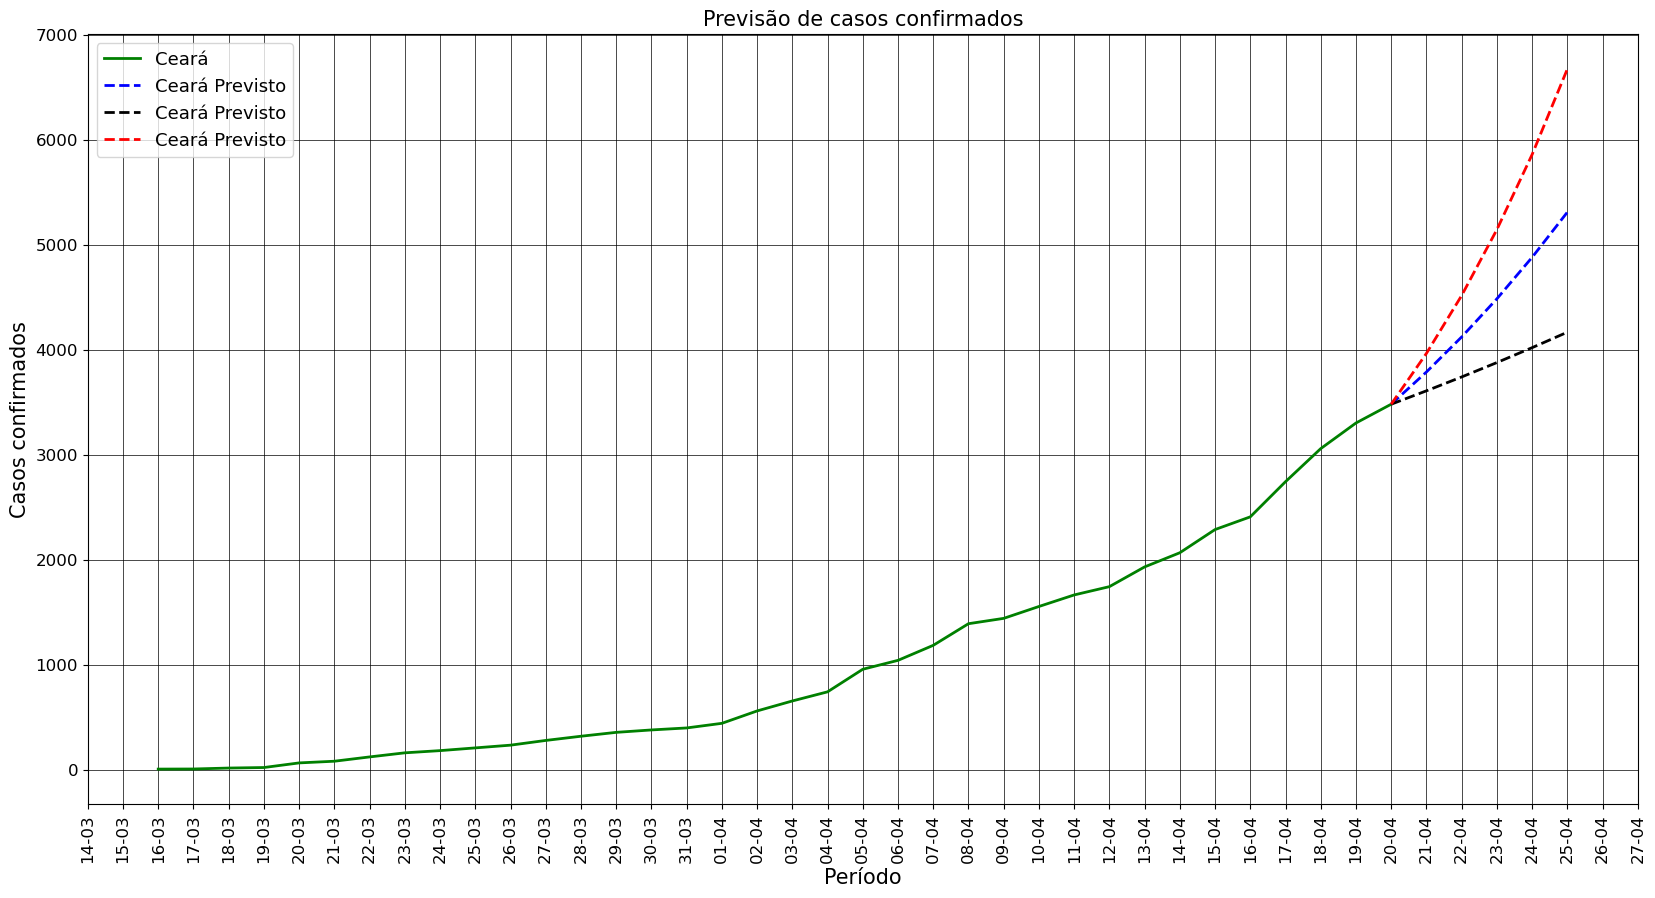

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Extrair dataframe original do Ceará
ceara

# Apagar colunas que não nos interessam
ceara_estimativa = ceara.drop(columns=['level_0', 'index', 'state', 'city','place_type', 'is_last','city_ibge_code'])


#ceara_estimativa['razao'] = ceara_estimativa['confirmed'].div(ceara_estimativa.groupby('date')['confirmed'].shift(1))


# Criar coluna razao de crescimento
for i in range(0, len(ceara_estimativa)-1):
    razao = ceara_estimativa['confirmed'].shift(0)[i+1]/ceara_estimativa['confirmed'].shift(1)[i+1]
    ceara_estimativa.loc[i, 'razao'] = razao
ceara_estimativa['razao'] = ceara_estimativa['razao'].shift(1)
ceara_estimativa = ceara_estimativa.fillna(0)

# Converter data para datetime
ceara_estimativa['date'] = pd.to_datetime(ceara_estimativa['date'])


# Média de crescimento - "DIAS" ultimos dias
def media_crescimentos(ceara_estimativa, opcao, dias, multiplicador):
    if opcao==1:
        media_crescimento = ceara_estimativa['razao'][-dias:].sum()/dias
        print('Taxa de crescimento médio: ' + str(media_crescimento))
        
    if opcao==2:
        media_crescimento = multiplicador
        print('Taxa de crescimento fixo: ' + str(media_crescimento))
    
    if opcao==3:
        menor_valor = ceara_estimativa[ceara_estimativa['razao']!=0]
        media_crescimento = menor_valor['razao'].min()
        print('Taxa de crescimento mínimo: ' + str(media_crescimento))

    if opcao==4:
        maior_valor_crescimento = ceara_estimativa[ceara_estimativa['razao']!=0]
        media_crescimento = maior_valor_crescimento['razao'][-dias:].max()
        print('Taxa de crescimento máximo: ' + str(media_crescimento))

    
    return(media_crescimento)

# Percentuais de crescimento
maior_valor_crescimento = media_crescimentos(ceara_estimativa, 4, 5, None)
media_crescimento_total = media_crescimentos(ceara_estimativa, 1, 5, None)
crescimento_fixo = media_crescimentos(ceara_estimativa, 2, None, 1.1)
menor_valor_crescimento = media_crescimentos(ceara_estimativa, 3, 5, None)
    
# Se continuar com esse crescimento, quantos casos terão no futuro?
ultima_data_final = ceara_estimativa.iloc[len(ceara_estimativa)-1,0]

def previsao(ceara_estimativa, dias_futuros, media_crescimento):
    for i in range(0, dias_futuros):
        ultima_data = ceara_estimativa.iloc[len(ceara_estimativa)-1,0]
        ultimo_confirmado = ceara_estimativa.iloc[len(ceara_estimativa)-1,1]
        futuro = ultimo_confirmado*media_crescimento
        ceara_estimativa = ceara_estimativa.append({'confirmed': futuro, 'date': ultima_data + datetime.timedelta(days=1)}, ignore_index=True)
    return(ceara_estimativa)


# Dataframes com os valores dos dias futuros
ceara_estimativa1 = previsao(ceara_estimativa, 5, media_crescimento_total)
ceara_estimativa2 = previsao(ceara_estimativa, 5, menor_valor_crescimento)
ceara_estimativa3 = previsao(ceara_estimativa, 5, maior_valor_crescimento)



# Ajustando tamanho gráfico
fig, ax = plt.subplots(figsize=(20, 10))

# Aumentar tamanho letras eixo y
plt.yticks(size = 12)
plt.xticks(size = 12)

novo_tamanho = len(ceara_estimativa)
plt.plot('date','confirmed', data=ceara_estimativa[ceara_estimativa['date'] <= ultima_data_final], color='green',   label='Ceará', linewidth=2)
plt.plot('date','confirmed', data=ceara_estimativa1[ceara_estimativa1['date'] >= ultima_data_final], color='blue', linestyle='--', label='Ceará Previsto', linewidth=2)
plt.plot('date','confirmed', data=ceara_estimativa2[ceara_estimativa2['date'] >= ultima_data_final], color='black',  linestyle='--', label='Ceará Previsto', linewidth=2)
plt.plot('date','confirmed', data=ceara_estimativa3[ceara_estimativa3['date'] >= ultima_data_final], color='red',  linestyle='--', label='Ceará Previsto', linewidth=2)


# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Casos confirmados', size = 15)
plt.title('Previsão de casos confirmados', size = 15)

# Colocar todos os dias no eixo x e formatando
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Linhas horizontais e verticais
plt.gca().yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)
plt.gca().xaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Rotacionando o eixo x
ax.tick_params(axis='x', rotation=90)

# Configurar tamanho da legenda
plt.legend(loc='best', prop={"size":13})



plt.show()

# Outras bases de análise

##  Óbitos por suspeita/confirmação de covid19, pneumonia ou insuficiência respiratória registrados nos cartórios

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, 'Semana epidemiológica')

Text(0, 0.5, 'Óbitos')

Text(0.5, 1.0, 'Comparação de óbitos por pneumonia, insuficiência respiratória e COVID-19 - Dados cartórios')

TypeError: set_major_formatter() missing 1 required positional argument: 'formatter'

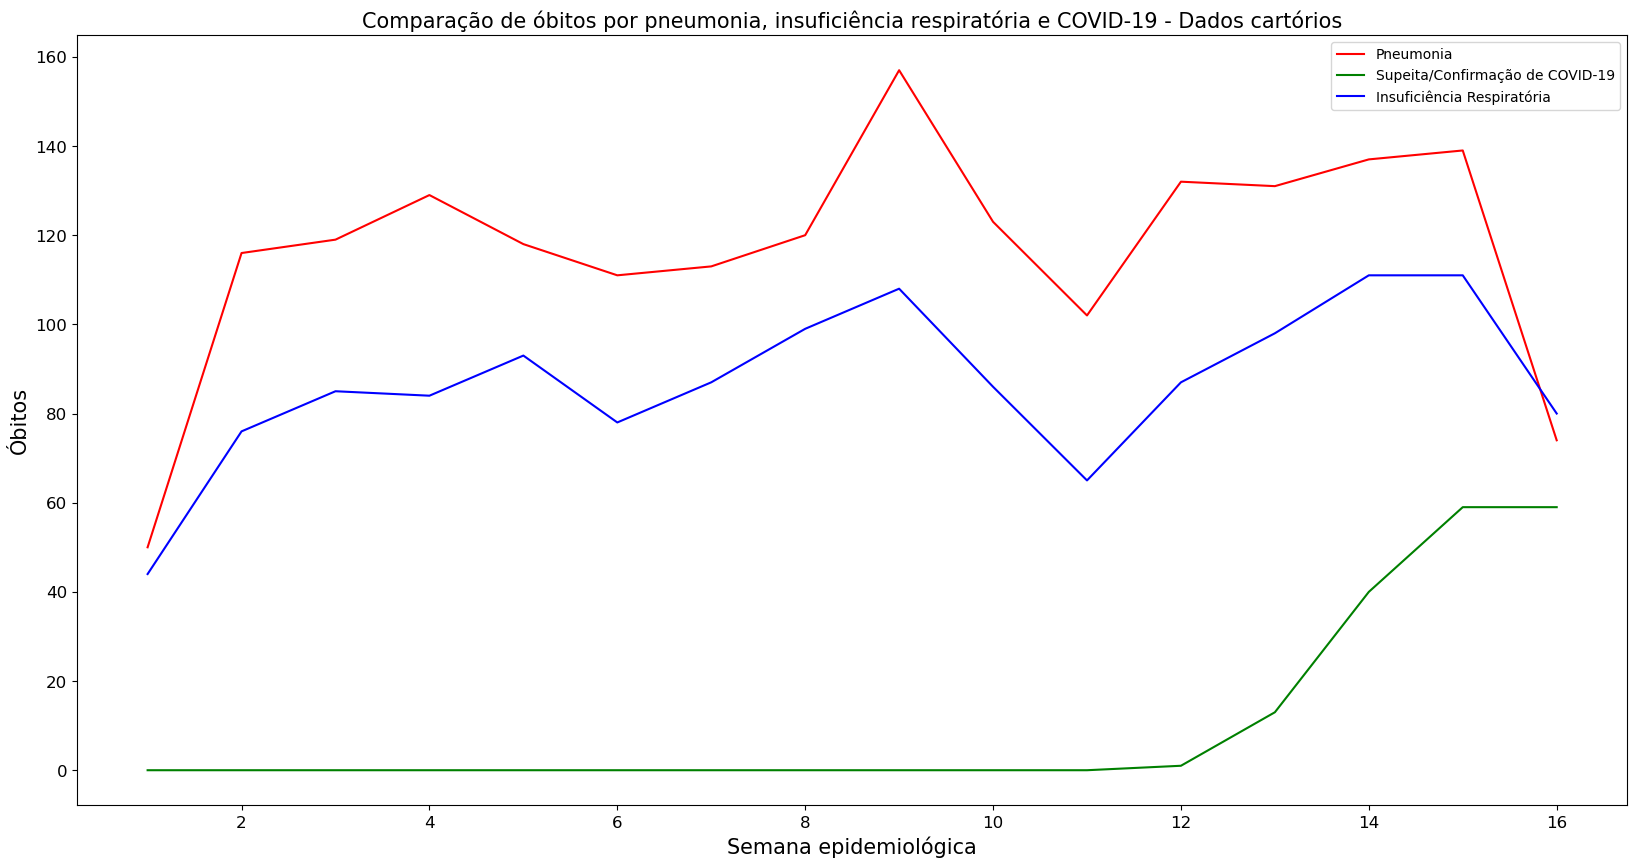

In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Baixar base CSV
df = pd.read_csv('https://brasil.io/dataset/covid19/obito_cartorio/?format=csv', encoding='latin-1')

# Base do Ceará
base_ceara = df[df['state']=='CE'].reset_index()

# Convertendo coluna "date" para datetime
base_ceara['date'] = pd.to_datetime(base_ceara['date'])

# Analisando por semana epidemiológica - lembrar que agora a coluna "epidemiological_week_2020" será index
base_ceara = base_ceara.groupby(['epidemiological_week_2020']).sum()
base_ceara = base_ceara[base_ceara.index < len(base_ceara)]

# # ----- PLOTANDO ------
# Ajustando tamanho gráfico
fig, ax = plt.subplots(figsize=(20, 10))


# gca stands for 'get current axis'
ax = plt.gca()

# Limite gráfico
#ax.set_xlim([1,len(base_ceara)-1])

# Aumentar tamanho letras eixo y
plt.yticks(size = 12)
plt.xticks(size = 12)

# Plotando
base_ceara.plot( y='new_deaths_pneumonia_2020', ax=ax,
           color='red', label='Pneumonia')
base_ceara.plot( y='new_deaths_covid19',
              ax=ax, color='green', label='Supeita/Confirmação de COVID-19')
base_ceara.plot( y='new_deaths_respiratory_failure_2020',
              ax=ax, color='blue', label='Insuficiência Respiratória')

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Semana epidemiológica', size = 15)
plt.ylabel('Óbitos', size = 15)
plt.title('Comparação de óbitos por pneumonia, insuficiência respiratória e COVID-19 - Dados cartórios', size = 15)

# Colocar todos os dias no eixo x e formatando
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Linhas horizontais e verticais
# plt.gca().yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)
# plt.gca().xaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Rotacionando o eixo x
ax.tick_params(axis='x', rotation=90)

# Configurar tamanho da legenda
plt.legend(loc='best', prop={"size":13})

plt.show()

## SRAG desde 2009

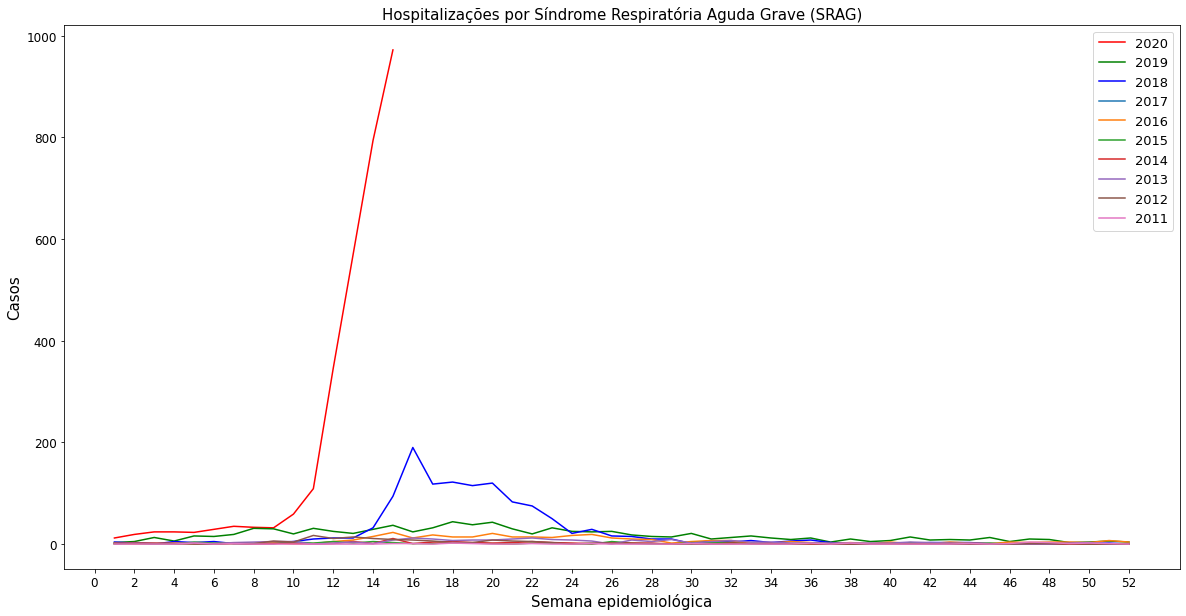

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Baixar base CSV
df = pd.read_csv('https://raw.githubusercontent.com/belisards/srag_brasil/master/data/casos_uf.csv', encoding='utf-8')
#https://raw.githubusercontent.com/belisards/srag_brasil/master/data/detalhe_uf.csv

# Base do Ceará
base_ceara = df[df['territory_name']=='Ceará'].reset_index()

# Anos
CE2020 = base_ceara[base_ceara['ano']==2020].reset_index()
CE2019 = base_ceara[base_ceara['ano']==2019].reset_index()
CE2018 = base_ceara[base_ceara['ano']==2018].reset_index()
CE2017 = base_ceara[base_ceara['ano']==2027].reset_index()
CE2016 = base_ceara[base_ceara['ano']==2016].reset_index()
CE2015 = base_ceara[base_ceara['ano']==2015].reset_index()
CE2014 = base_ceara[base_ceara['ano']==2014].reset_index()
CE2013 = base_ceara[base_ceara['ano']==2013].reset_index()
CE2012 = base_ceara[base_ceara['ano']==2012].reset_index()
CE2011 = base_ceara[base_ceara['ano']==2011].reset_index()
CE2010 = base_ceara[base_ceara['ano']==2010].reset_index()


# # ----- PLOTANDO ------
# Ajustando tamanho gráfico
fig, ax = plt.subplots(figsize=(20, 10))


# gca stands for 'get current axis'
ax = plt.gca()

# Aumentar tamanho letras eixo y
plt.yticks(size = 12)
plt.xticks(size = 12)



# Plotando
CE2020.plot(x = 'epiweek', y='casos', ax=ax,
           color='red', label='2020')
CE2019.plot(x = 'epiweek',y='casos',
              ax=ax, color='green', label='2019')
CE2018.plot(x = 'epiweek',y='casos',
              ax=ax, color='blue', label='2018')
CE2017.plot(x = 'epiweek',y='casos',
              ax=ax,  label='2017')
CE2016.plot(x = 'epiweek',y='casos',
              ax=ax,  label='2016')
CE2015.plot(x = 'epiweek',y='casos',
              ax=ax,  label='2015')
CE2014.plot(x = 'epiweek',y='casos',
              ax=ax,  label='2014')
CE2013.plot(x = 'epiweek',y='casos',
              ax=ax,  label='2013')
CE2012.plot(x = 'epiweek',y='casos',
              ax=ax, label='2012')
CE2011.plot(x = 'epiweek',y='casos',
              ax=ax, label='2011')

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Semana epidemiológica', size = 15)
plt.ylabel('Casos', size = 15)
plt.title('Hospitalizações por Síndrome Respiratória Aguda Grave (SRAG)', size = 15)

# Linhas horizontais e verticais
# plt.gca().yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)
# plt.gca().xaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)
ax.set_xticks(np.arange(len(CE2011['epiweek'])+1)[::2])

# Rotacionando o eixo x
#ax.tick_params(axis='x', rotation=90)

# Configurar tamanho da legenda
plt.legend(loc='best', prop={"size":13})

plt.show()

# Mundo

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


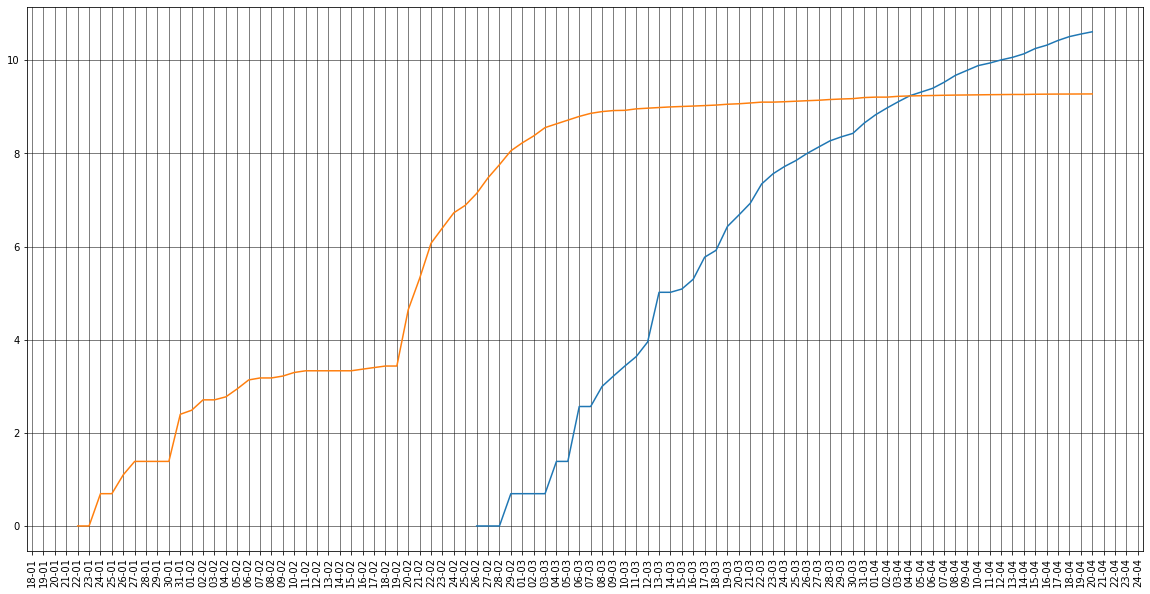

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np

# Baixar dados
# Tirar descricao quando for baixar
#df = pd.read_csv('https://coronadatascraper.com/timeseries.csv')
df['date'] = pd.to_datetime(df['date'])
paises=df[df['level']=='country']
paises['log'] = np.log(paises['cases'])


lista_paises = paises['country'].unique()

# Ajustando tamanho gráfico
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.gca()

for i in lista_paises:
    if i in ['South Korea', 'Brazil']:
        teste = paises[paises['country']==i]
        plt.plot(teste['date'],teste['log'])

# korea = df[(df['country']=='South Korea') & (df['level']=='country')]
# china = df[(df['country']=='China') & (df['level']=='country')]
# italy = df[(df['country']=='Italy') & (df['level']=='country')]
# spain =df[(df['country']=='Spain') & (df['level']=='country')]
# USA =df[(df['country']=='United States') & (df['level']=='country')]



# korea.plot(x='date', y='cases', ax=ax, label='South Korea')
# china.plot(x='date', y='cases', ax=ax, label='China')
# italy.plot(x='date', y='cases', ax=ax, label='Italy')
# spain.plot(x='date', y='cases', ax=ax, label='Spain')
# USA.plot(x='date', y='cases', ax=ax, label='United States')

# Linhas horizontais e verticais
plt.gca().yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)
plt.gca().xaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Colocar todos os dias no eixo x e formatando
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Rotacionando o eixo x
ax.tick_params(axis='x', rotation=90)

# Configurar tamanho da legenda
#plt.legend(loc='lower left', prop={"size":13})